# Лабораторная работа 6  
## Синтезаторы частот и ФАПЧ
Выполнила: Шаповалова Виктория, ИКТ-11М.  

### 1. Импорт библиотек  
В данном разделе импортируются библиотеки, которые будут использоваться в ходе выполнения работы.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 2. Задание параметров  
В данном разделе задаются параметры, которые будут использованы в ходе выполнения работы.

In [58]:
# vco
K_vco = 0.1
fs_vco = 1e7
Ts_vco = 1/fs_vco
f_vco = 1000

# detector
fs_pd = 1e5 #частота дискретизации
Ts_pd = 1/fs_pd #период дискретизации
f1 = 1e3 #частота внешнего сигнала
f2 = 1.1e3 #частота сигнала с ГУН
K_pd = 1 #коэффициент фазового детектора

# filter
fs_lf = 1e6
Ts_lf = 1/fs_lf
f_lf = 1e3

### 3. Схема модели  
Схема ФАПЧ (фазовой автоподстройки частоты) состоит из замкнутой цепи, в состав которой входят: фазовый детектор, петлевой фильтр и генератор, управляемый напряжением. На вход генератора, управляемого напряжением, поступает управляющий сигнал с петлевого фильтра. ГУН создает локальный сигнал, который поступает на один из входов фазового детектора. На второй вход поступает внешний сигнал. С выхода фазового детектора сигнал поступает на петлевой фильтр, который преобразует сигнал после фазового детектора в управляющий сигнал для ГУН. Таким образом, цепь замыкается.    
В ходе работы по порядку реализованы все перечисленные блоки для создания схемы ФАПЧ.

# 4. ГУН  
В данном разделе описан класс ГУН и рассмотрены его входной и выходной сигналы. 

C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\2959188908.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\2959188908.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\2959188908.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


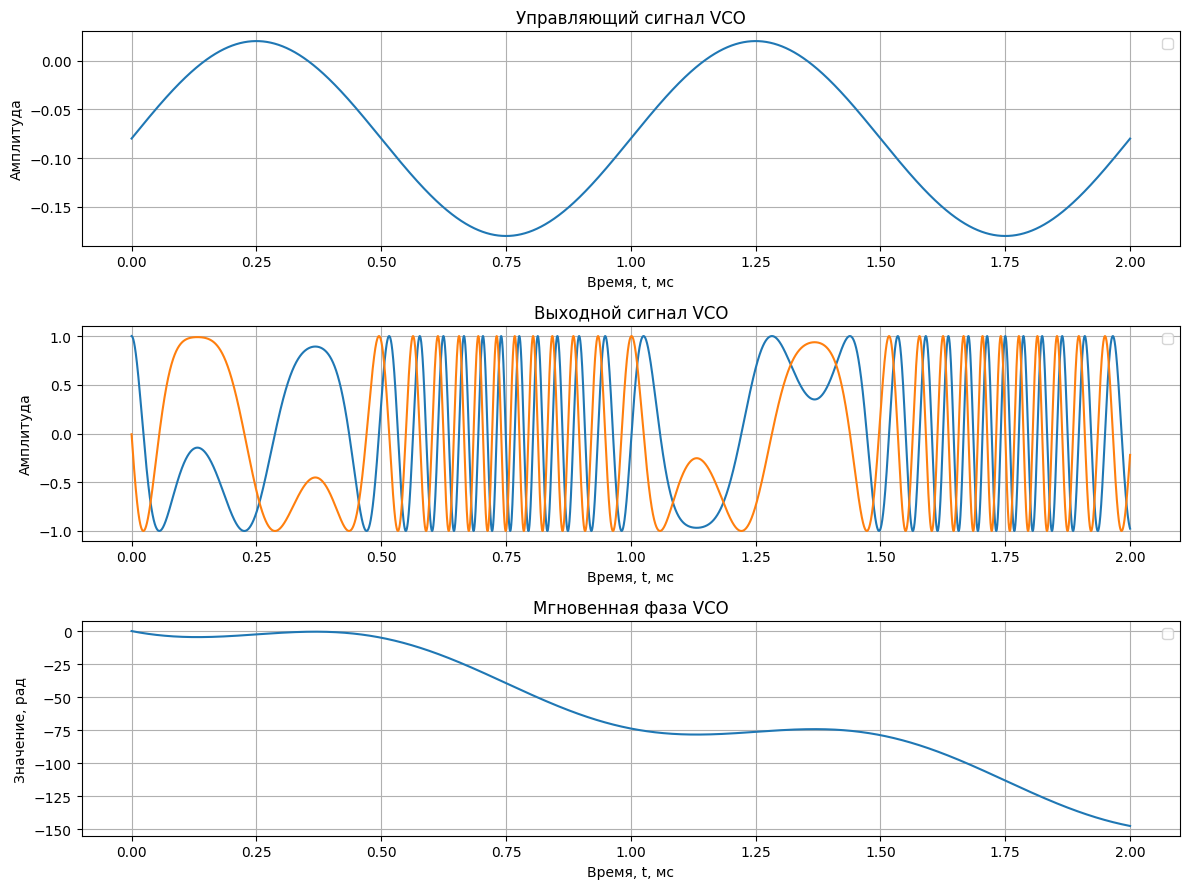

In [59]:
def vco(delta_phase_LP, state):
    state['phase'] += state['K_vco'] * delta_phase_LP + state['delta_phase_VCO']
    complex_signal = np.exp(1j * state['phase']) 
    return complex_signal, state['phase'], state



t = np.arange(0, 2*fs_vco/f_vco)/fs_vco
s = 0.1*(-0.8 + np.sin(2*np.pi*f_vco*t))

vco_state = {
    'phase': 0,
    'delta_phase_VCO': 2*np.pi*1000/fs_vco,  
    'K_vco': K_vco                       
}

res_vco = np.zeros(shape=np.shape(s), dtype=complex)
phase_vco = np.zeros(shape=np.shape(s))

for i in range(len(s)):
    res_vco[i], phase_vco[i], vco_state = vco(s[i], vco_state)

plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(t*1e3, s)
plt.title('Управляющий сигнал VCO')
plt.ylabel('Амплитуда')
plt.xlabel('Время, t, мс')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t*1e3, np.real(res_vco))
plt.plot(t*1e3, np.imag(res_vco))
plt.title('Выходной сигнал VCO')
plt.ylabel('Амплитуда')
plt.xlabel('Время, t, мс')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t*1e3, phase_vco)
plt.title('Мгновенная фаза VCO')
plt.ylabel('Значение, рад')
plt.xlabel('Время, t, мс')
plt.grid()
plt.legend()
plt.tight_layout()

### 5. Фазовый детектор
В данном разделе создается функция фазового детектора и выводятся графики сигналов до и после прохождения через блок.  
В данном случае предполагается, что на с выхода фазового детектора поступает непосредственно разность фаз, поскольку рассматривается линейная версия ФАПЧ, у которой ошибка стремится к нулю. В таком случае, коэффициент фазового детектора всегда должен составлять $K_{PD} = 1$.

C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\948508530.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  s[i] = (input[i]*vco_out[i])


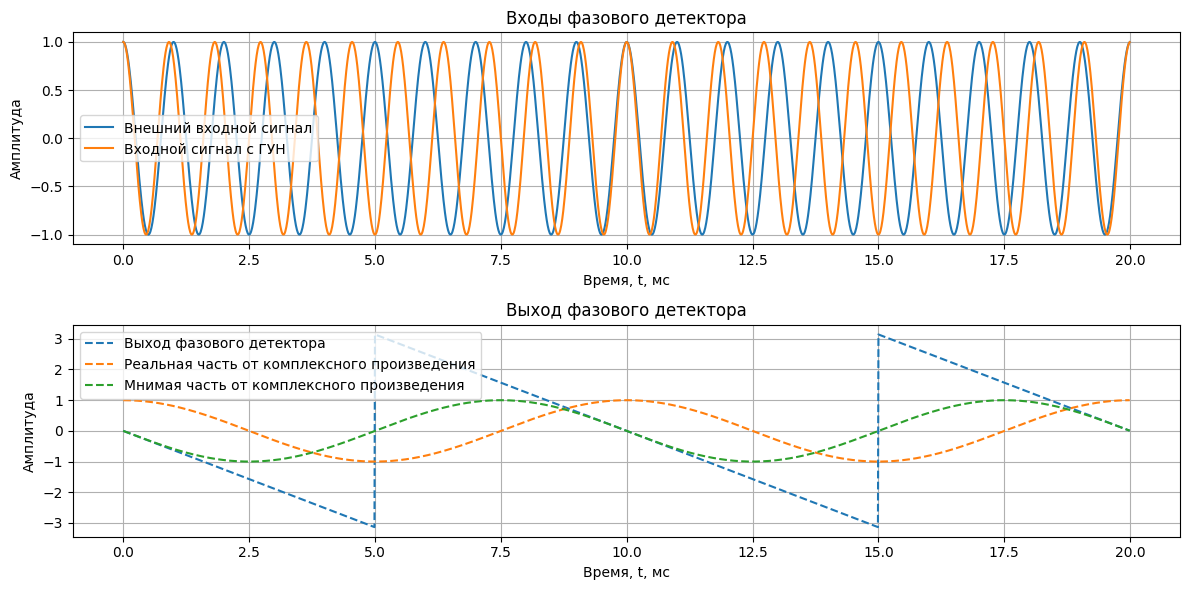

In [60]:
def PhaseDetector(input, vco, K_pd):
    err = np.angle(input*np.conjugate(vco))
    return K_pd*err

t = np.arange(0, 2000)/fs_pd
input = np.exp(1j*(2*np.pi*f1*t))
vco_out = np.exp(1j*(2*np.pi*f2*t))

res_pd = np.zeros(shape=np.shape(input))
s = np.zeros(shape=np.shape(input))
for i in np.arange(0, len(input)):
    res_pd[i] = PhaseDetector(input[i], vco_out[i], K_pd)
    s[i] = (input[i]*vco_out[i])

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t*1e3, input, label = 'Внешний входной сигнал')
plt.plot(t*1e3, vco_out, label = 'Входной сигнал с ГУН')
plt.title('Входы фазового детектора')
plt.ylabel('Амплитуда')
plt.xlabel('Время, t, мс')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t*1e3, res_pd, '--', label = 'Выход фазового детектора')
plt.plot(t*1e3, np.real(input*np.conjugate(vco_out)), '--', label = 'Реальная часть от комплексного произведения')
plt.plot(t*1e3, np.imag(input*np.conjugate(vco_out)), '--', label = 'Мнимая часть от комплексного произведения')
plt.title('Выход фазового детектора')
plt.ylabel('Амплитуда')
plt.xlabel('Время, t, мс')
plt.grid()
plt.legend()
plt.tight_layout()


### 6. Петлевой фильтр  
В качестве петлевого фильтра выбран пропорционально-интегрирующий фильтр.
Петлевой фильтр имеет несколько коэффициентов, которые вычисляются следующим образом:
1) Пропорциональный коэффициент $K_P$ - определяет пропорциональную составляющую сигнала, которая зависит от текущего входного отсчета
$$e_{F,1}[n] = K_P \cdot e_D[n]$$

2) Интегральный коэффициент $K_I$ - определяет интегральную составляющую сигнала, которая зависит от текущего и предыдущих входных отсчетов. Данный компонент приближает к нулю ошибку ФАПЧ при установлении синхронизации.
$$e_{F,2}[n] = e_{F,2}[n-1] + K_i \cdot e_D[n]$$

Значения коэффициентов зависят от выбранных значений коэффициента демпфирования и собственной частоты контура.

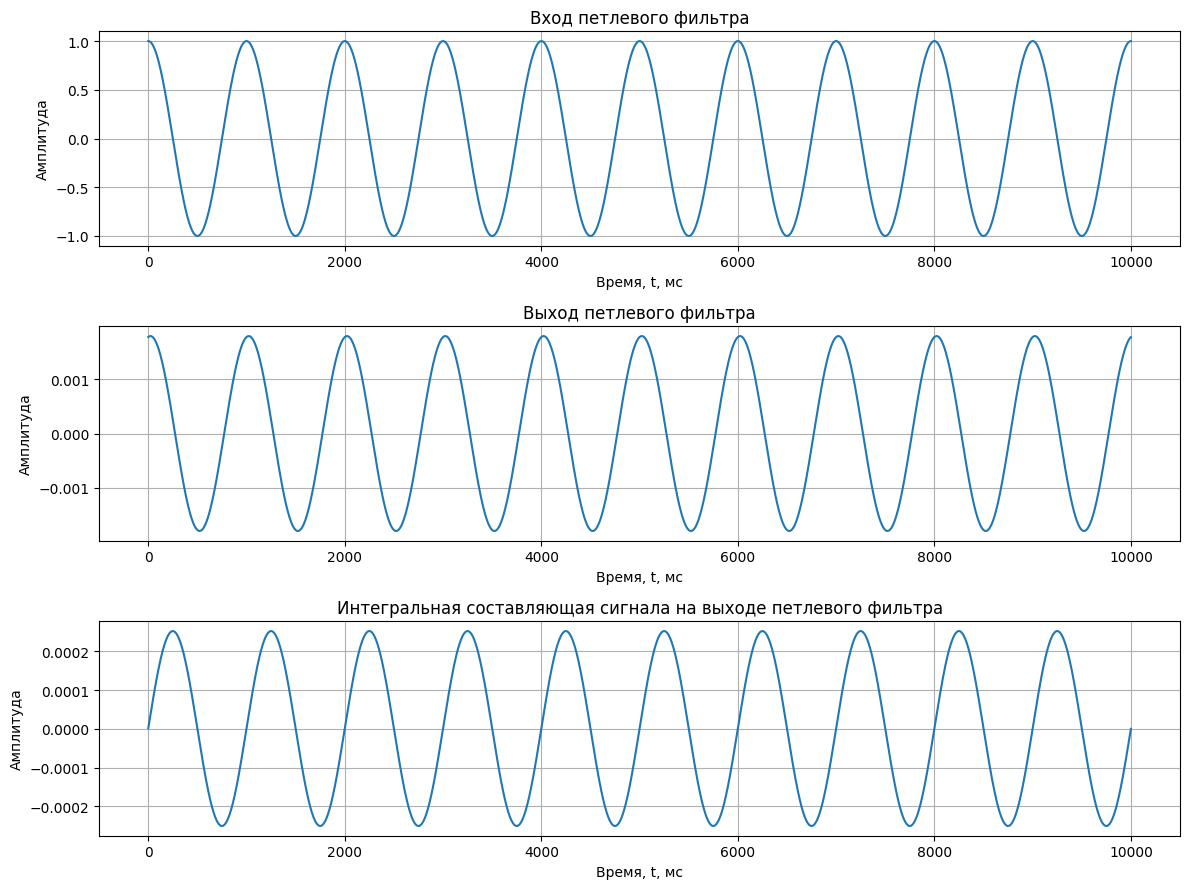

In [61]:
#Функция для ограничения фазы в диапазоне [-2pi, 2pi]
def phase_unwrap_lp(phase):
    while phase > 2*np.pi:
        phase -= 2*np.pi
    while phase < -2*np.pi:
        phase += 2*np.pi
    return phase

#Создает и возвращает состояние петлевого фильтра
def create_loop_filter(fs, K_pd, K_nco):
    damping_factor = np.sqrt(2)/2
    natural_freq = 2*np.pi*fs/5000
    equivalent_noise_bandwidth = natural_freq/2*(damping_factor + 1/(4*damping_factor))
    
    K_p = 1/(K_pd*K_nco)*(4*damping_factor/(damping_factor + 1/(4*damping_factor)))*equivalent_noise_bandwidth/fs
    K_i = 1/(K_pd*K_nco)*(4/(damping_factor + 1/(4*damping_factor))**2)*(equivalent_noise_bandwidth/fs)**2
    
    return {
        'integral_part': 0,
        'damping_factor': damping_factor,
        'natural_freq': natural_freq,
        'equivalent_noise_bandwidth': equivalent_noise_bandwidth,
        'K_p': K_p,
        'K_i': K_i
    }
#Обновляет параметры петлевого фильтра
def update_loop_filter_params(state, fs, K_pd, K_nco):
    state['equivalent_noise_bandwidth'] = state['natural_freq']/2*(state['damping_factor'] + 1/(4*state['damping_factor']))
    state['K_p'] = 1/(K_pd*K_nco)*(4*state['damping_factor']/(state['damping_factor'] + 1/(4*state['damping_factor'])))*state['equivalent_noise_bandwidth']/fs
    state['K_i'] = 1/(K_pd*K_nco)*(4/(state['damping_factor'] + 1/(4*state['damping_factor']))**2)*(state['equivalent_noise_bandwidth']/fs)**2
    return state

#Обрабатывает один сэмпл через петлевой фильтр
def loop_filter_process(state, error_sample):
    proportional_part = state['K_p'] * error_sample
    state['integral_part'] += state['K_i'] * error_sample
    output = proportional_part + state['integral_part']
    return output, state['integral_part'], state


t = np.arange(0, 10*fs_lf/f_lf)/fs_lf
s = np.cos(2*np.pi*f_lf*t)

filter_state = create_loop_filter(fs_lf, 1, 1)

res_lp = np.zeros(shape=np.shape(s))
LP_integral = np.zeros(shape=np.shape(s))

for i in range(len(s)):
    res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, s[i])

plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(s)
plt.title('Вход петлевого фильтра')
plt.ylabel('Амплитуда')
plt.xlabel('Время, t, мс')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(res_lp, '-')
plt.title('Выход петлевого фильтра')
plt.ylabel('Амплитуда')
plt.xlabel('Время, t, мс')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(LP_integral)
plt.title('Интегральная составляющая сигнала на выходе петлевого фильтра')
plt.ylabel('Амплитуда')
plt.xlabel('Время, t, мс')
plt.grid()
plt.tight_layout()
plt.show()

### 7.ФАПЧ  
Реализованные выше блоки далее объединены в единый ФАПЧ.

In [62]:
fs_pll = 1e6
Ts_pll = 1/fs_pll
f_vco = 2000 # Начальная частота ГУН
f_sig = f_vco + 1000 # Частота входного сигнала
K_pd = 1 # Коэффициент усиления фазового детектора
K_vco = 1 # Коэффициент VCO

C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\1519424058.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_error[i] = signal_input[i] - signal_out[i]
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\1519424058.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\1519424058.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')


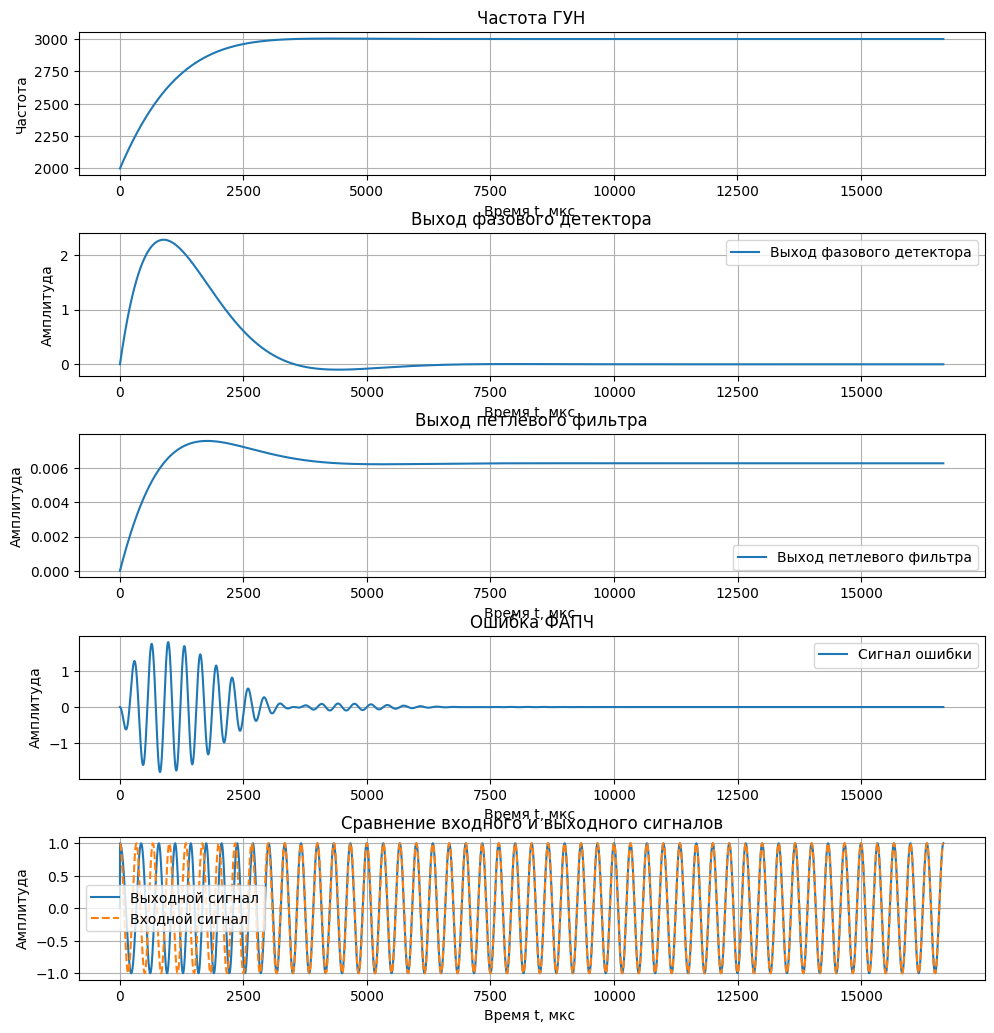

In [63]:
t = np.arange(0, 50*fs_pll/f_sig)/fs_pll
signal_input = np.exp(1j*(2*np.pi*f_sig*t))

filter_state = create_loop_filter(fs_pll, K_pd, K_vco)
res_lp = np.zeros(shape=np.shape(signal_input))
LP_integral = np.zeros(shape=np.shape(signal_input))


vco_state = {
    'phase': 0,
    'delta_phase_VCO': 2*np.pi*f_vco/fs_pll,  
    'K_vco': K_vco                       
}

res_vco = np.zeros(shape=np.shape(signal_input), dtype=complex)
phase_vco = np.zeros(shape=np.shape(signal_input))


phase_detector_out = np.zeros((np.shape(signal_input)), dtype=complex)


signal_error = np.zeros((np.shape(signal_input)))
signal_out = np.zeros((np.shape(signal_input)))


for i in np.arange(1, len(signal_input)):
    res_vco[i], phase_vco[i], vco_state = vco(res_lp[i-1], vco_state)
        
    signal_out[i] = np.real(res_vco[i])
    signal_error[i] = signal_input[i] - signal_out[i]
    
    phase_detector_out[i] = PhaseDetector(signal_input[i], res_vco[i], 1)
    res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])


    
plt.figure(figsize=(10,10))

plt.subplot(5, 1, 1)
plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')
plt.title('Частота ГУН')
plt.xlabel('Время t, мкс ')
plt.grid()
plt.ylabel('Частота')
plt.tight_layout()
 
plt.subplot(5, 1, 2)
plt.plot(np.arange(0, len(phase_detector_out))/fs_pll*1e6, phase_detector_out, '-', label = 'Выход фазового детектора')
plt.title('Выход фазового детектора')
plt.xlabel('Время t, мкс ')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(np.arange(0, len(res_lp))/fs_pll*1e6, res_lp, '-', label = 'Выход петлевого фильтра')
plt.title('Выход петлевого фильтра')
plt.xlabel('Время t, мкс ')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(np.arange(0, len(signal_error))/fs_pll*1e6, signal_error, '-', label = 'Сигнал ошибки')
plt.title('Ошибка ФАПЧ')
plt.xlabel('Время t, мкс ')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(np.arange(0, len(signal_out))/fs_pll*1e6, signal_out, '-', label = 'Выходной сигнал')
plt.plot(np.arange(0, len(signal_input))/fs_pll*1e6, signal_input, '--', label = 'Входной сигнал')
plt.title('Сравнение входного и выходного сигналов')
plt.xlabel('Время t, мкс ')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()


На полученных графиках представлены выходы каждого из блоков, а также ошибка ФАПЧ и сравнение входного и выходного сигналов. Графики показывают корректную работу системы: каждому блоку и, соответственно, системе в целом требуется некоторое время на подстройку, после чего всё начинает стабильно корректно работать.

### 8. Изучение влияния шума на работу системы  
В данной части было выполнено исследование зависимости работы ФАПЧ от величины SNR. Для этого реализована функция генерации АБГШ и добавление его к входному сигналу. Величина отношения сигнал/шум изменялась от -5 до +30 дБ.

C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3979420130.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_error[i] = signal_input[i] - signal_out[i]
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3979420130.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3979420130.py:55: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')


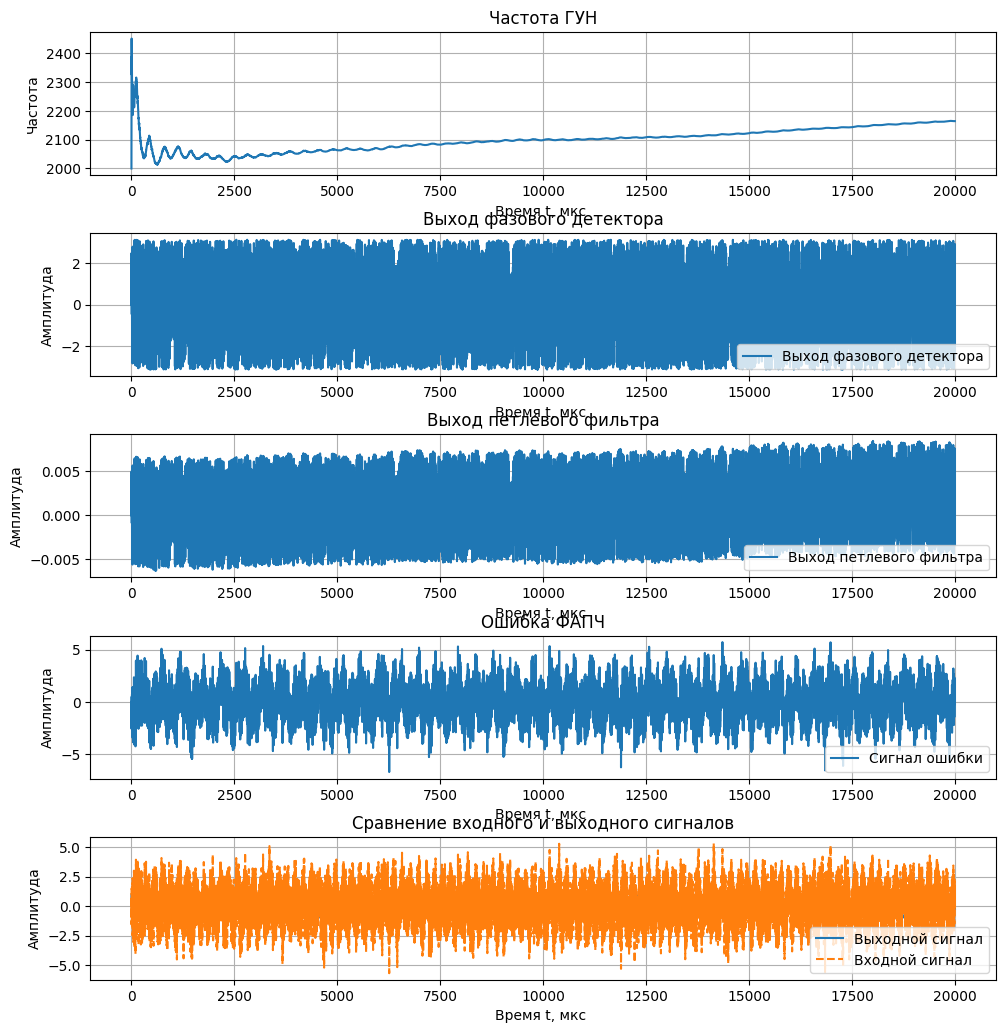

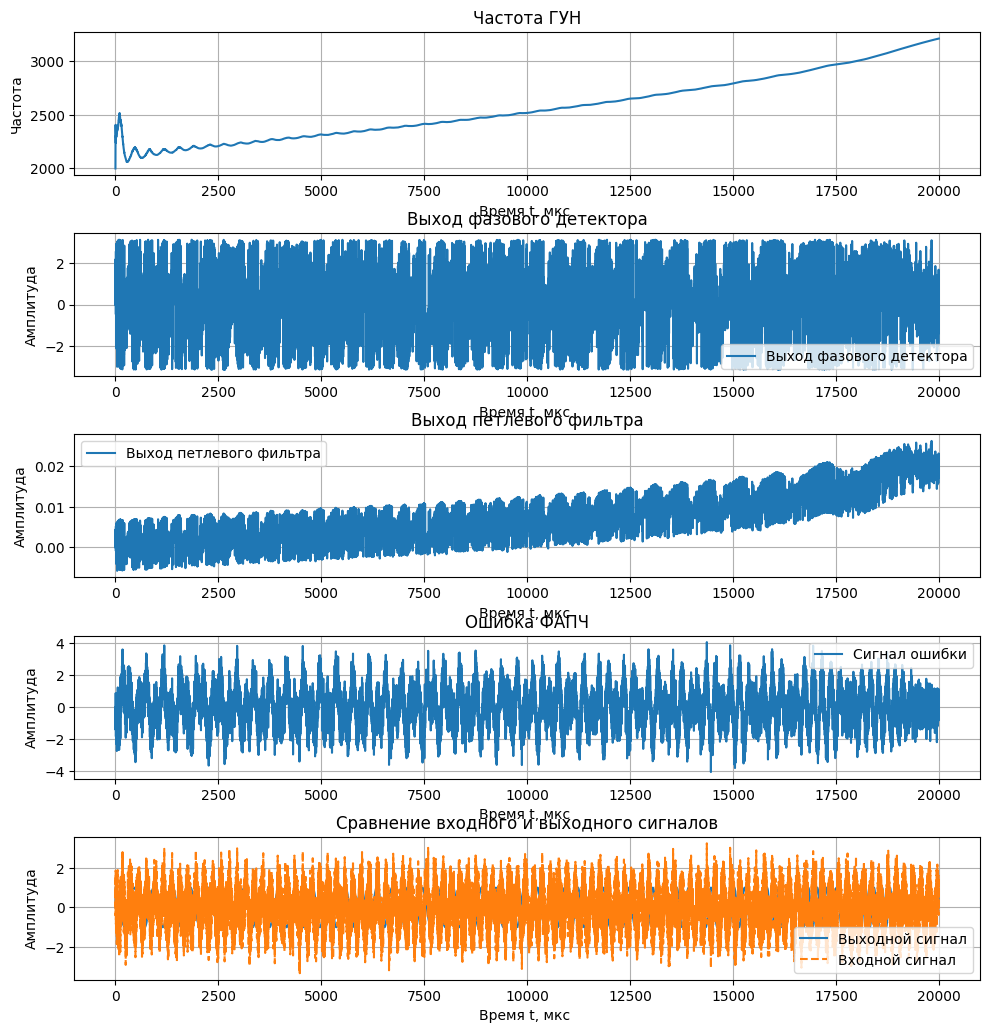

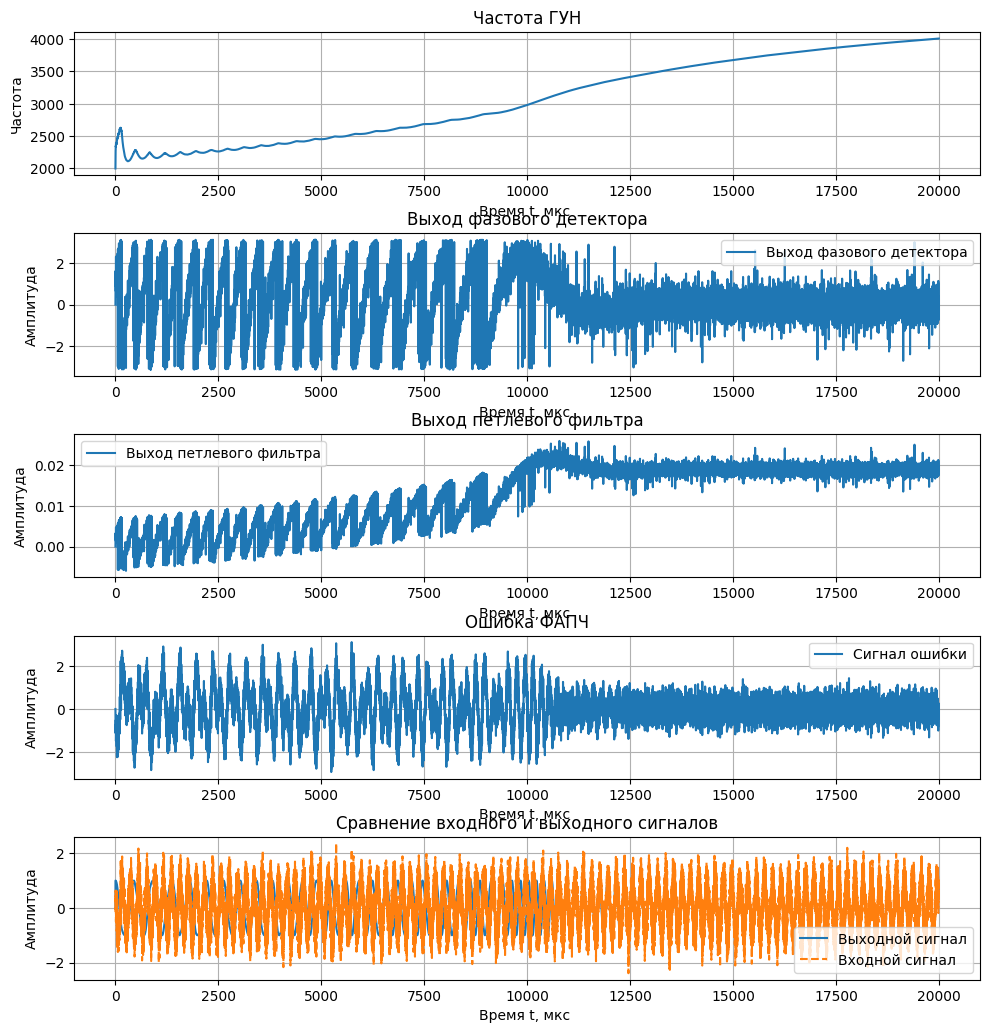

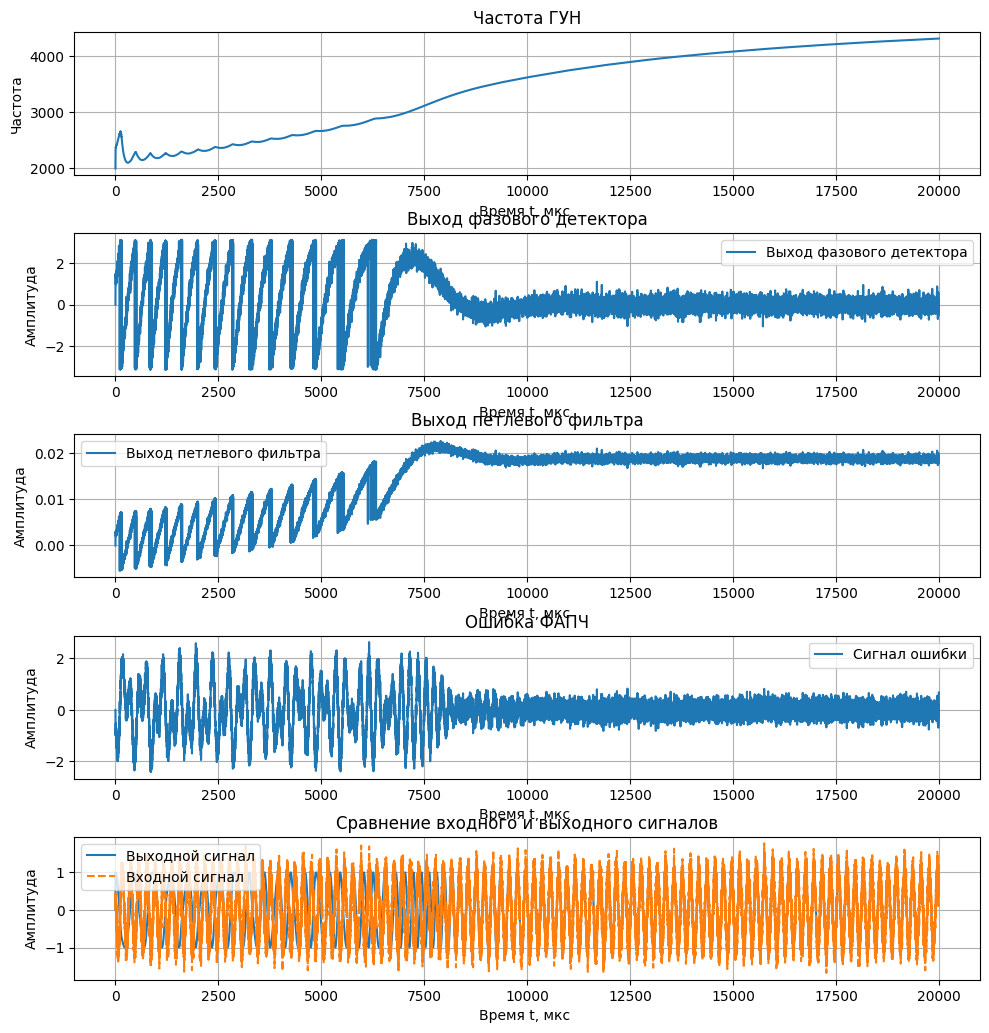

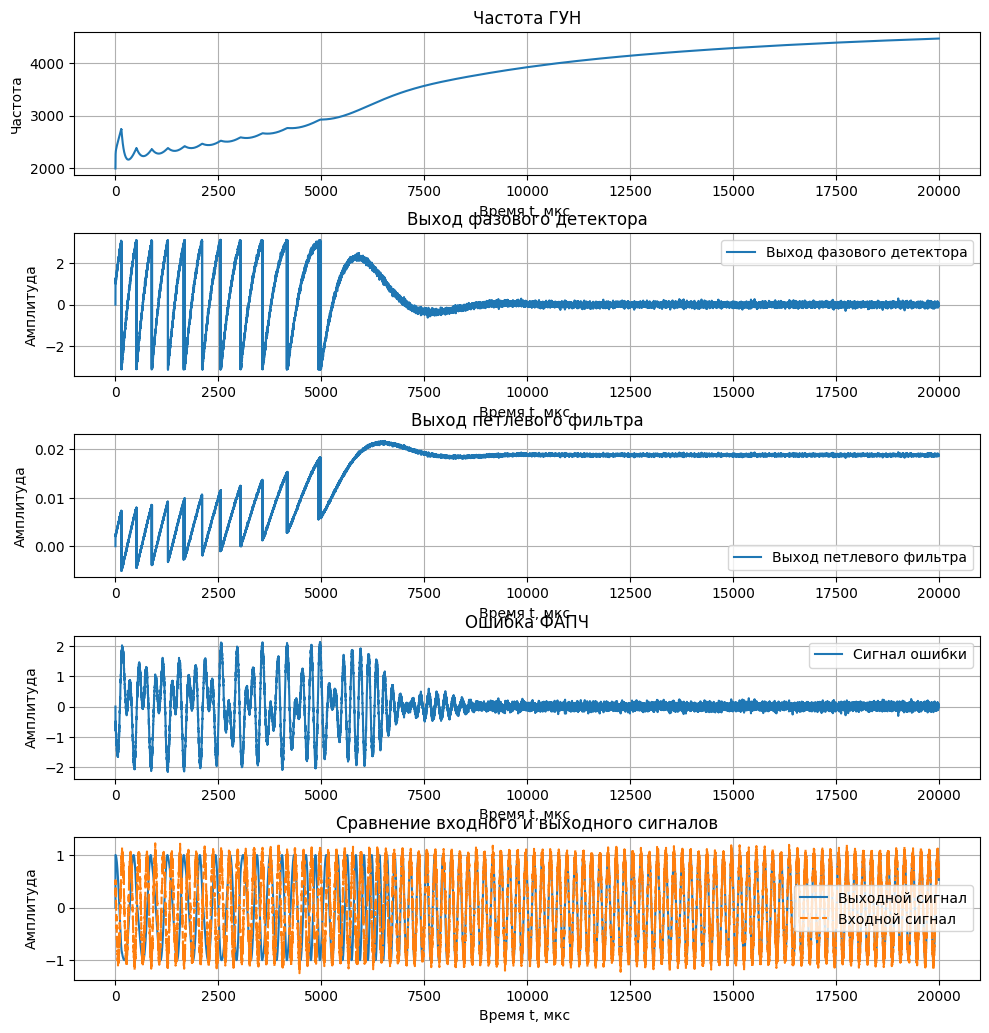

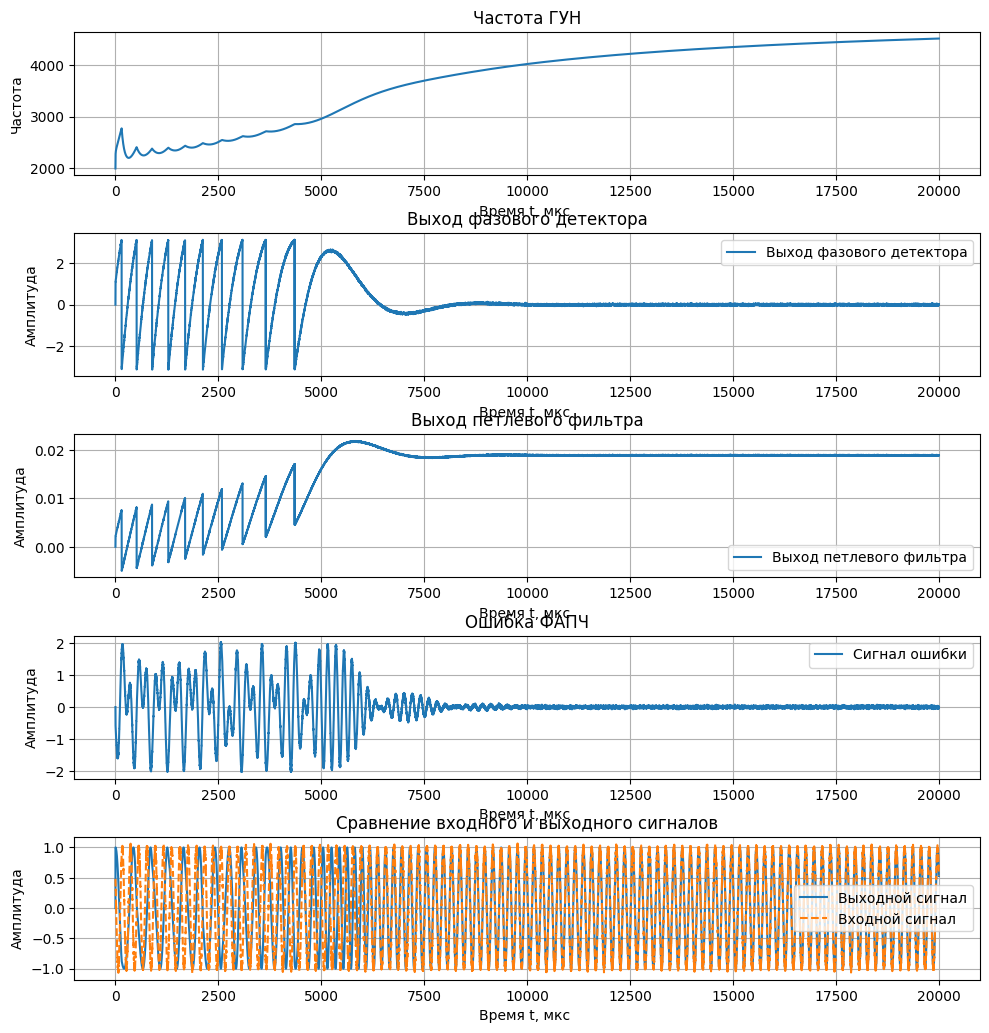

In [64]:
def awgn(signal, SNR):
    power_signal_linear = np.sum(np.abs(signal)**2)/signal.size
    power_noise = power_signal_linear/(10**(SNR/10))
    noise = np.sqrt(power_noise / 2) * (np.random.randn(len(signal)) + 1j*np.random.randn(len(signal)))
    return signal + noise

def PLL_snr(fs_pll, f_sig, f_vco, p_sig, K_pd, K_vco, snr, number_periods):

    t = np.arange(0, number_periods*fs_pll/f_sig)/fs_pll
    signal_input = np.exp(1j*(2*np.pi*f_sig*t+p_sig))
    signal_input = awgn(signal_input, snr)

    filter_state = {
        'integral_part': 0,
        'damping_factor': 0.5,
        'natural_freq': 2*np.pi*fs_pll/1000,
        'equivalent_noise_bandwidth': 0.001*fs_pll,
        'K_p' : 1/(K_pd*K_vco)*(4*0.5/(0.5 + 1/(4*0.5)))*0.001*fs_pll/fs_pll,
        'K_i' : 1/(K_pd*K_vco)*(4/(0.5 + 1/(4*0.5))**2)*(0.001*fs_pll/fs_pll)**2
    }

    res_lp = np.zeros(shape=np.shape(signal_input))
    LP_integral = np.zeros(shape=np.shape(signal_input))


    vco_state = {
        'phase': 0,
        'delta_phase_VCO': 2*np.pi*f_vco/fs_pll,  
        'K_vco': K_vco                       
    }

    res_vco = np.zeros(shape=np.shape(signal_input), dtype=complex)
    phase_vco = np.zeros(shape=np.shape(signal_input))


    phase_detector_out = np.zeros((np.shape(signal_input)), dtype=complex)


    signal_error = np.zeros((np.shape(signal_input)))
    signal_out = np.zeros((np.shape(signal_input)))


    for i in np.arange(1, len(signal_input)):
        res_vco[i], phase_vco[i], vco_state = vco(res_lp[i-1], vco_state)
        
        signal_out[i] = np.real(res_vco[i])
        signal_error[i] = signal_input[i] - signal_out[i]
    
        phase_detector_out[i] = PhaseDetector(signal_input[i], res_vco[i], 1)
        res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])
    
    plt.figure(figsize=(10,10))

    plt.subplot(5, 1, 1)
    plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')
    plt.title('Частота ГУН')
    plt.xlabel('Время t, мкс ')
    plt.grid()
    plt.ylabel('Частота')
    plt.tight_layout()
    
    plt.subplot(5, 1, 2)
    plt.plot(np.arange(0, len(phase_detector_out))/fs_pll*1e6, phase_detector_out, '-', label = 'Выход фазового детектора')
    plt.title('Выход фазового детектора')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    plt.subplot(5, 1, 3)
    plt.plot(np.arange(0, len(res_lp))/fs_pll*1e6, res_lp, '-', label = 'Выход петлевого фильтра')
    plt.title('Выход петлевого фильтра')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    plt.subplot(5, 1, 4)
    plt.plot(np.arange(0, len(signal_error))/fs_pll*1e6, signal_error, '-', label = 'Сигнал ошибки')
    plt.title('Ошибка ФАПЧ')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    plt.subplot(5, 1, 5)
    plt.plot(np.arange(0, len(signal_out))/fs_pll*1e6, signal_out, '-', label = 'Выходной сигнал')
    plt.plot(np.arange(0, len(signal_input))/fs_pll*1e6, signal_input, '--', label = 'Входной сигнал')
    plt.title('Сравнение входного и выходного сигналов')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()
    
fs = 1e6
f_vco = 2000
f_sig = f_vco + 3000
p_sig = np.pi/3
K_pd = 1
K_vco = 1
number_periods = 100
snr = [-5, 0, 5, 10, 20, 30]

for snr_i in snr:
    PLL_snr(fs, f_sig, f_vco, p_sig, K_pd, K_vco, snr_i, number_periods)

Результаты моделирования показали, что АБГШ значительно влияет на работу ФАПЧ. При значении -5 дБ значение ошибки имеет шумоподобный график с амплитудой +-5 дБ. С увеличением SNR резульаты улучшаются: ФАПЧ начинает отрабатывать, время на подстройку блоков уменьшается, амплитуда ошибки уменьшается. Наилучший результат получен при значении SNR = 30 дБ, он наиболее приближен к графику моделирования без шума.

### 9. Изучение работы ФАПЧ при разных частотах входного сигнала  
В данной части исследованы результаты работы ФАПЧ при разных частотах входного сигнала. Для этого обновлены функция ФАПЧ и заданы значения частоты входного сигнала от 2 кГц до 10 кГц.

C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\1791092902.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_error[i] = signal_input[i] - signal_out[i]
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\1791092902.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])


C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\1791092902.py:48: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')


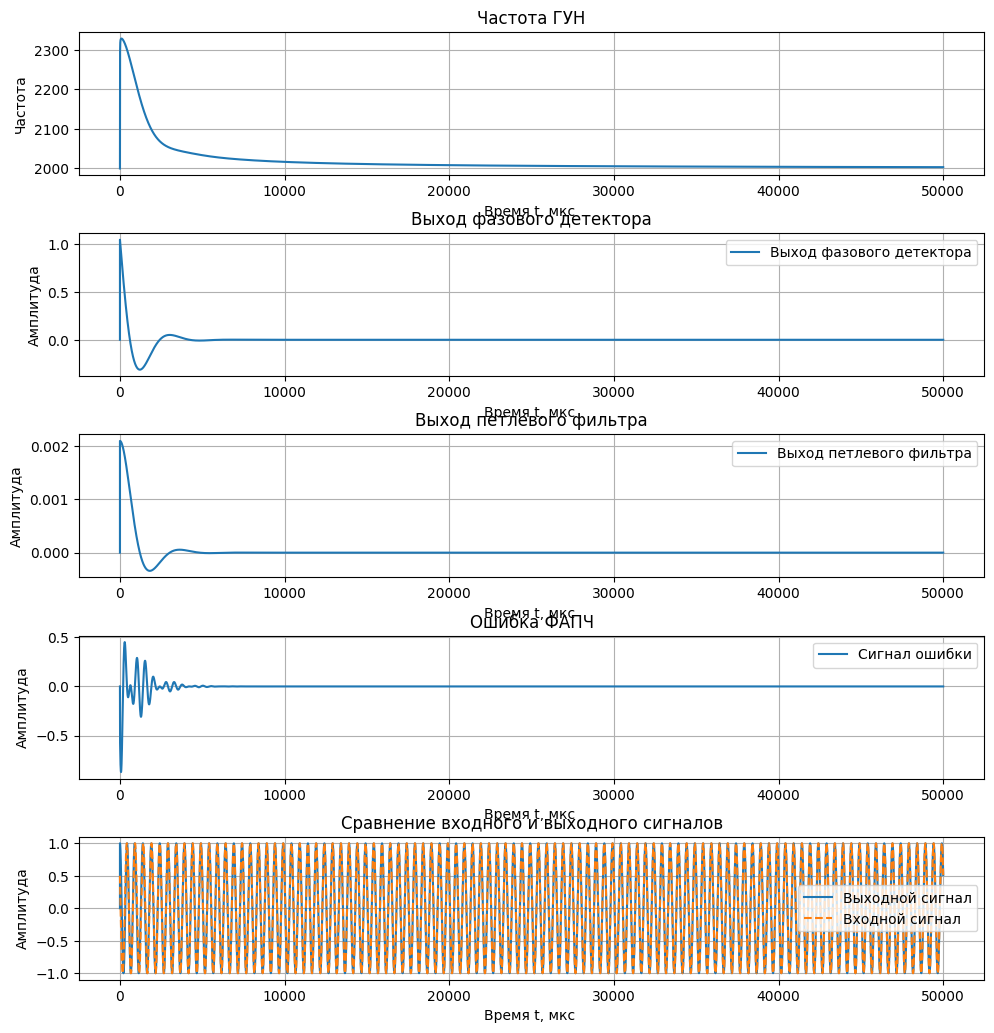

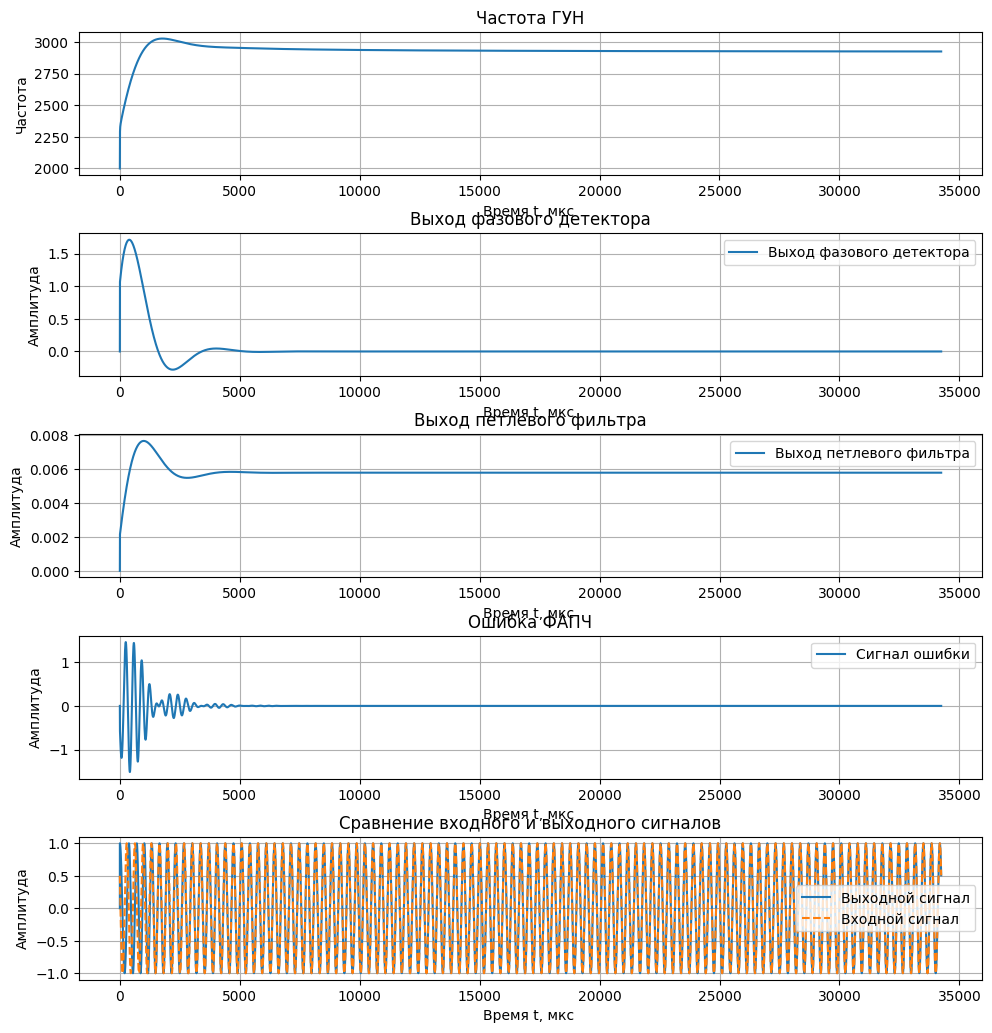

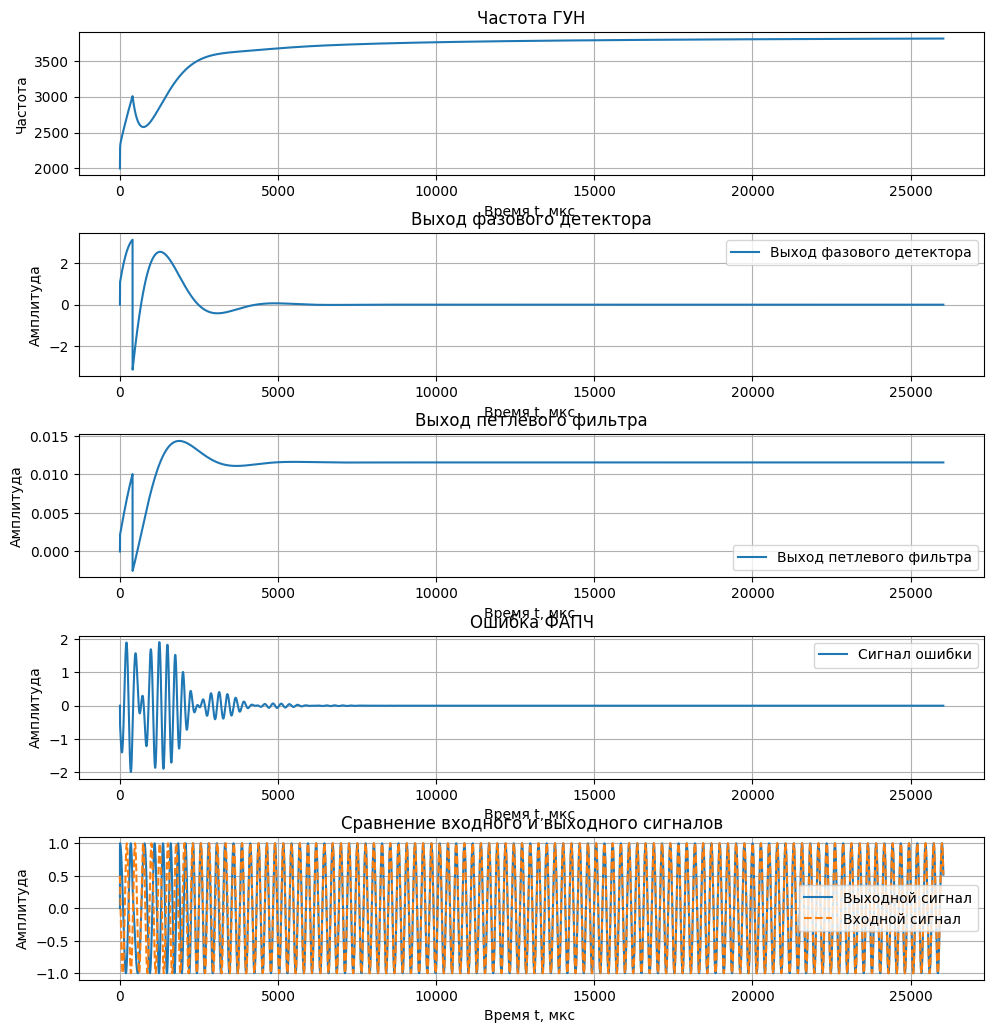

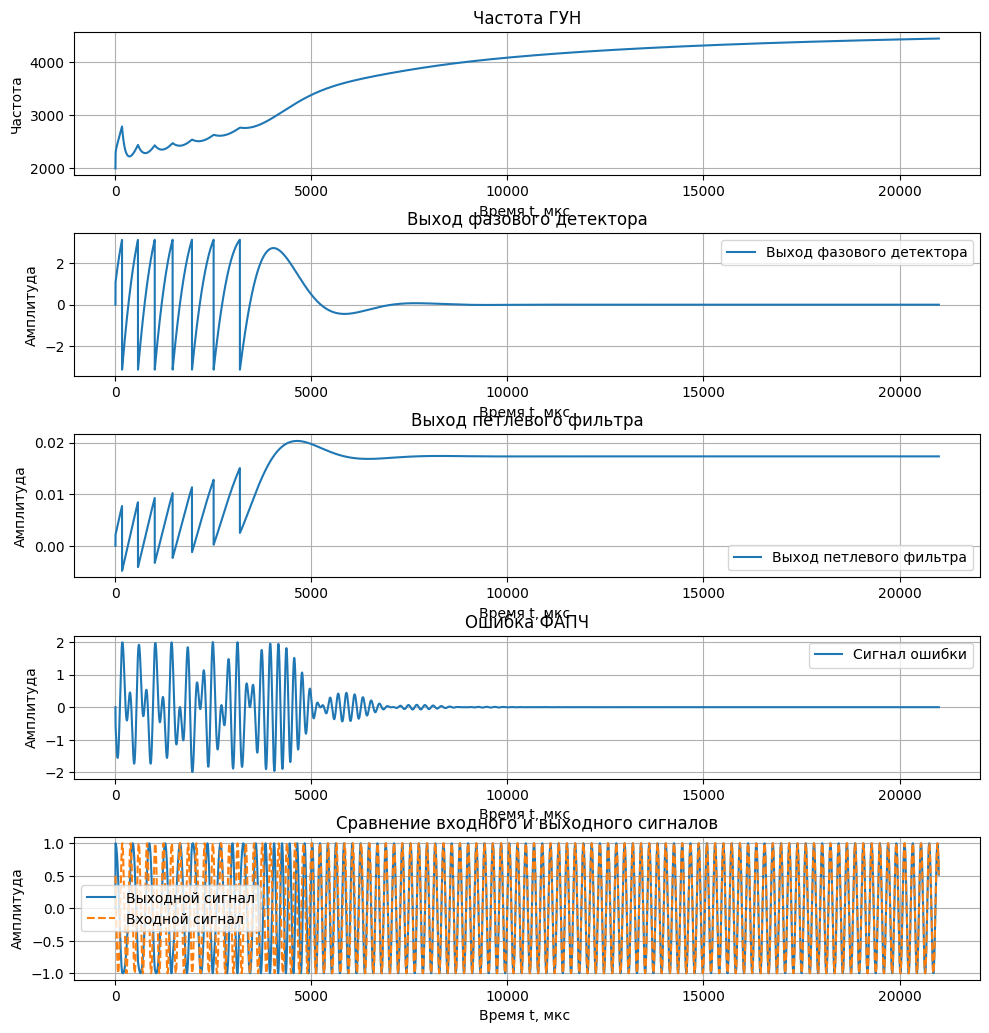

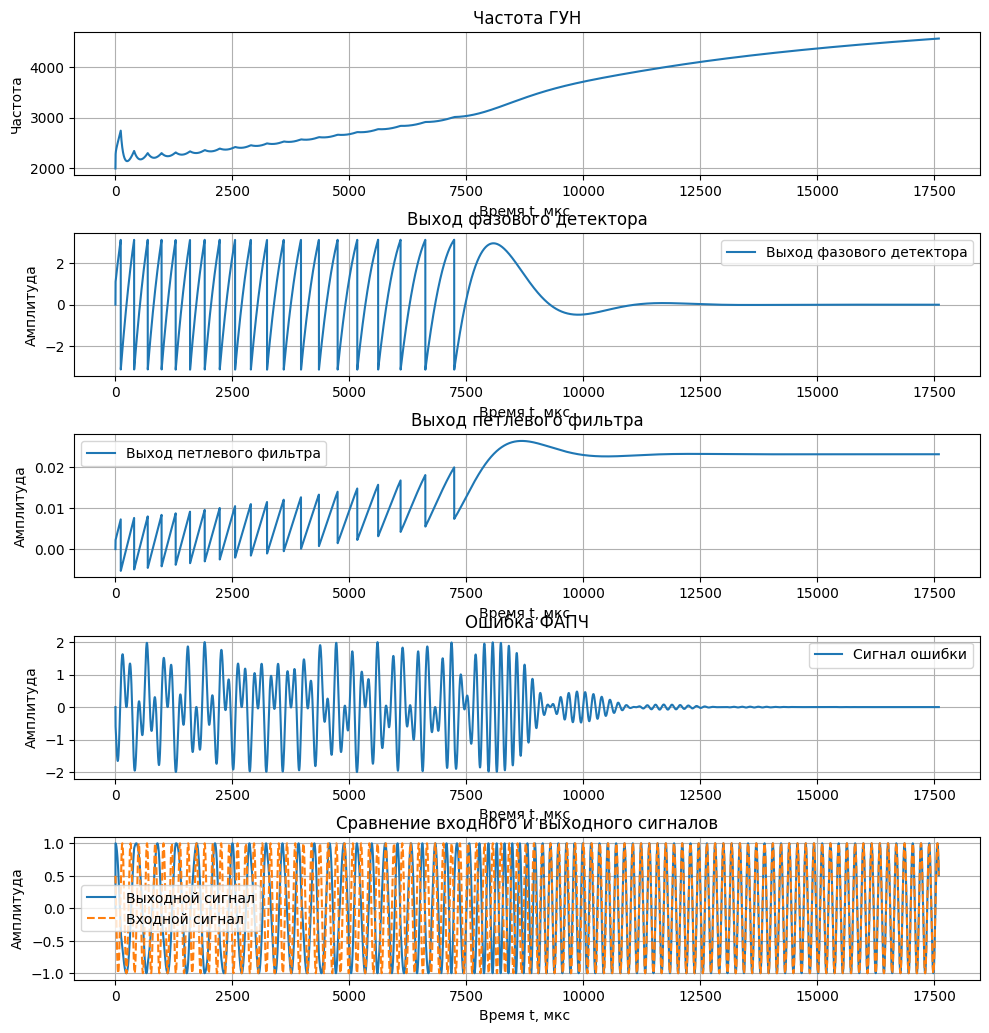

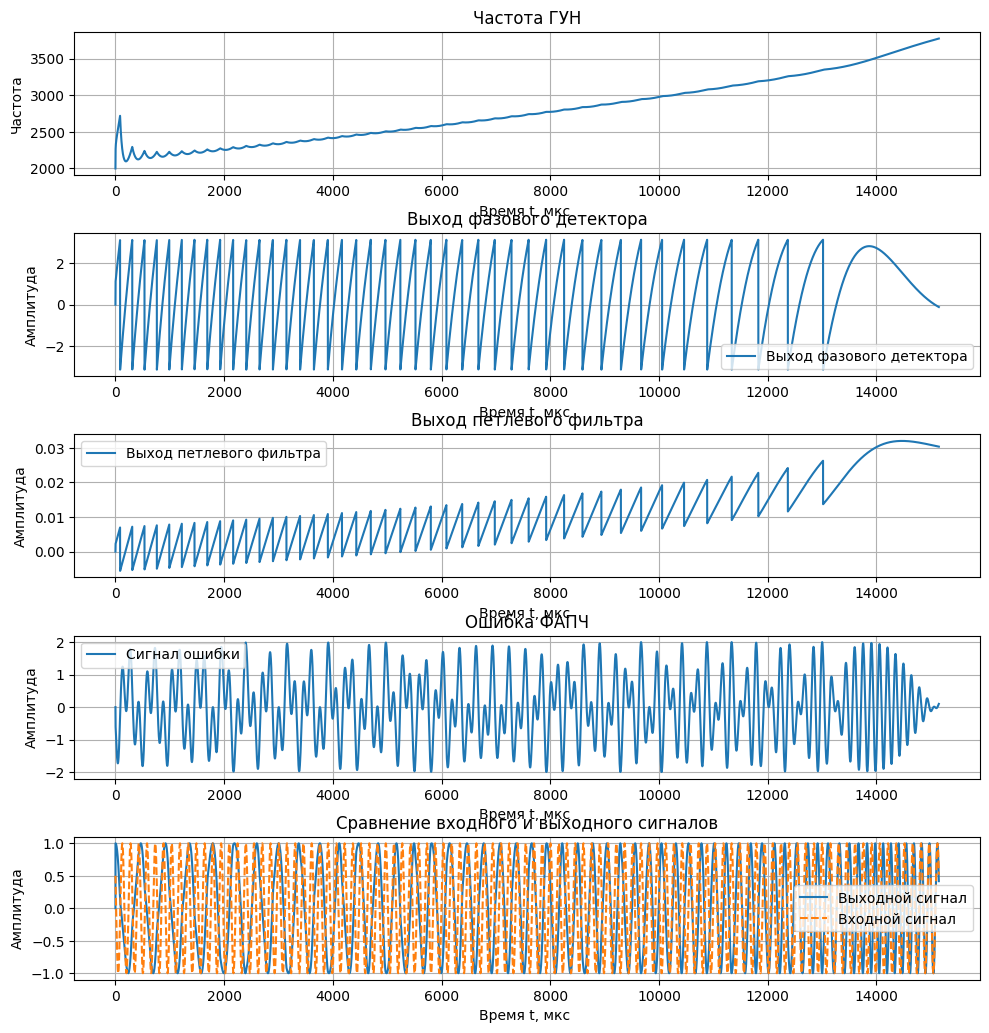

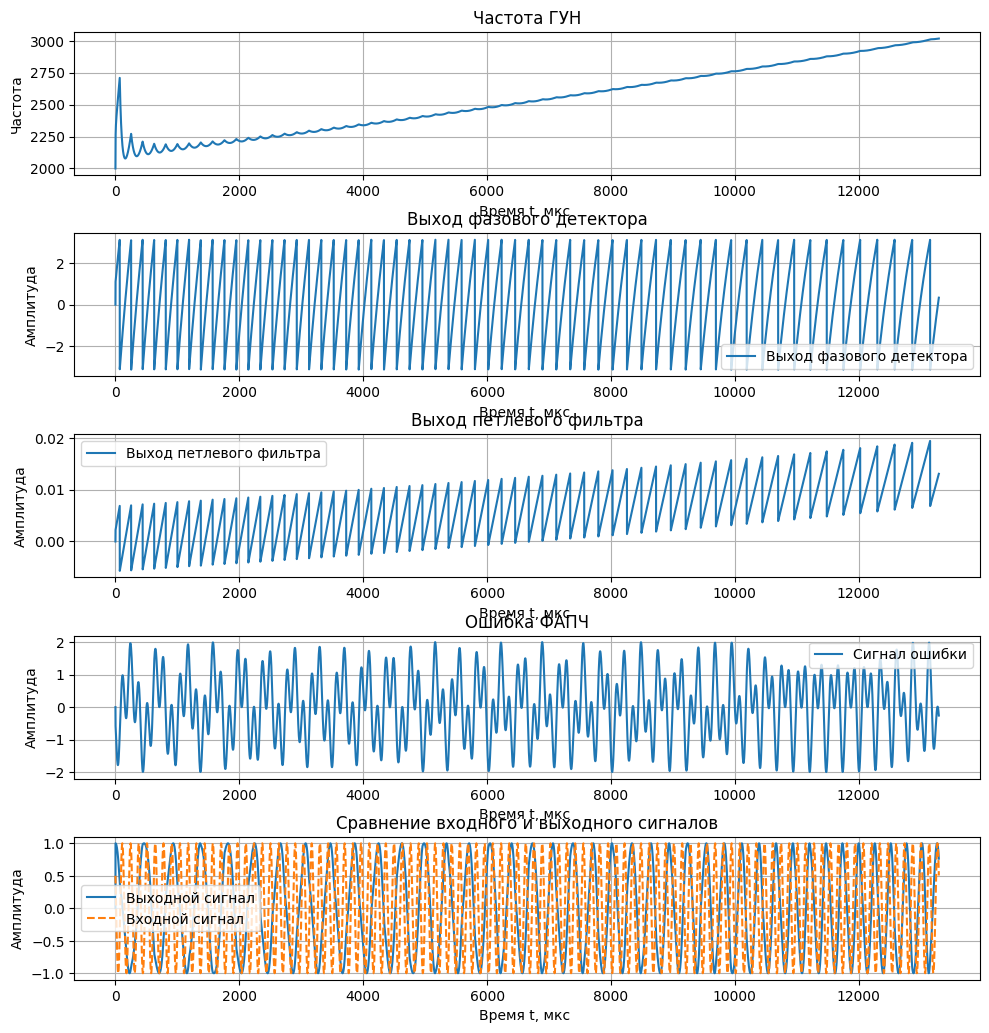

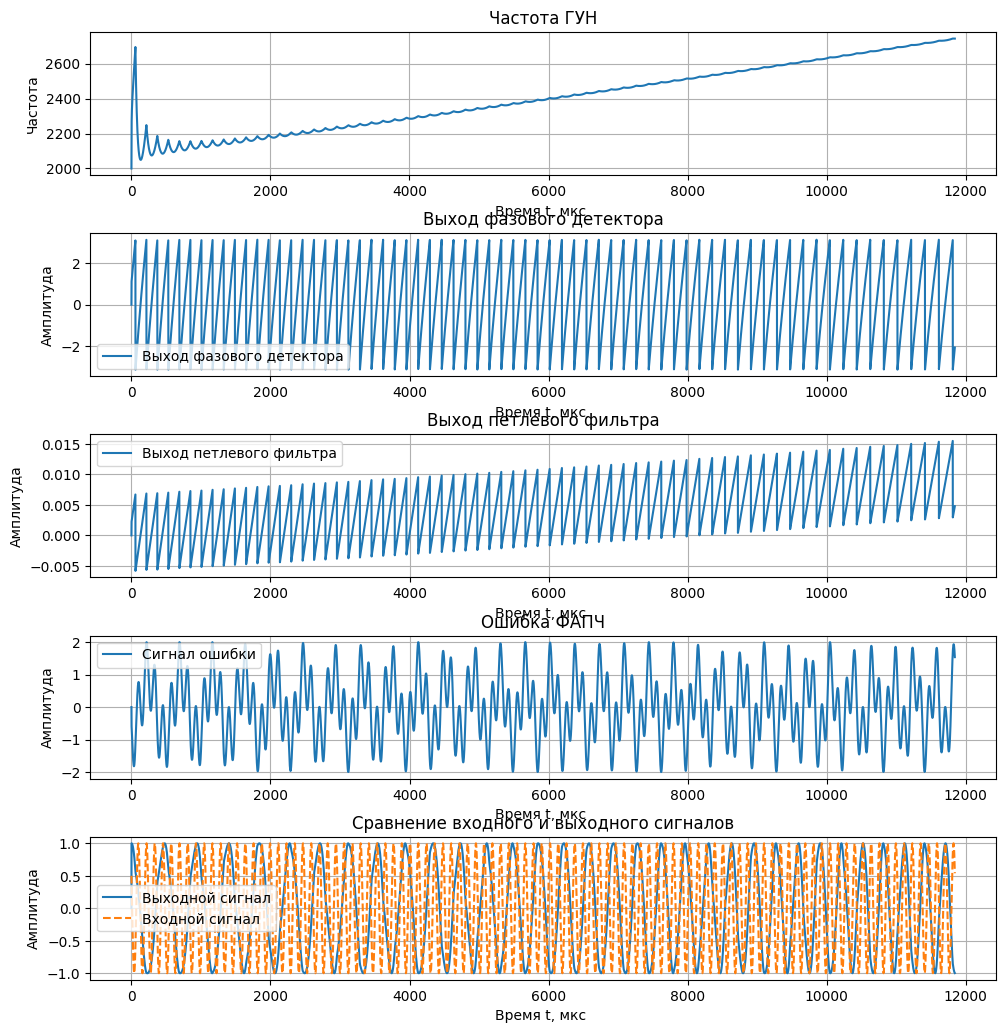

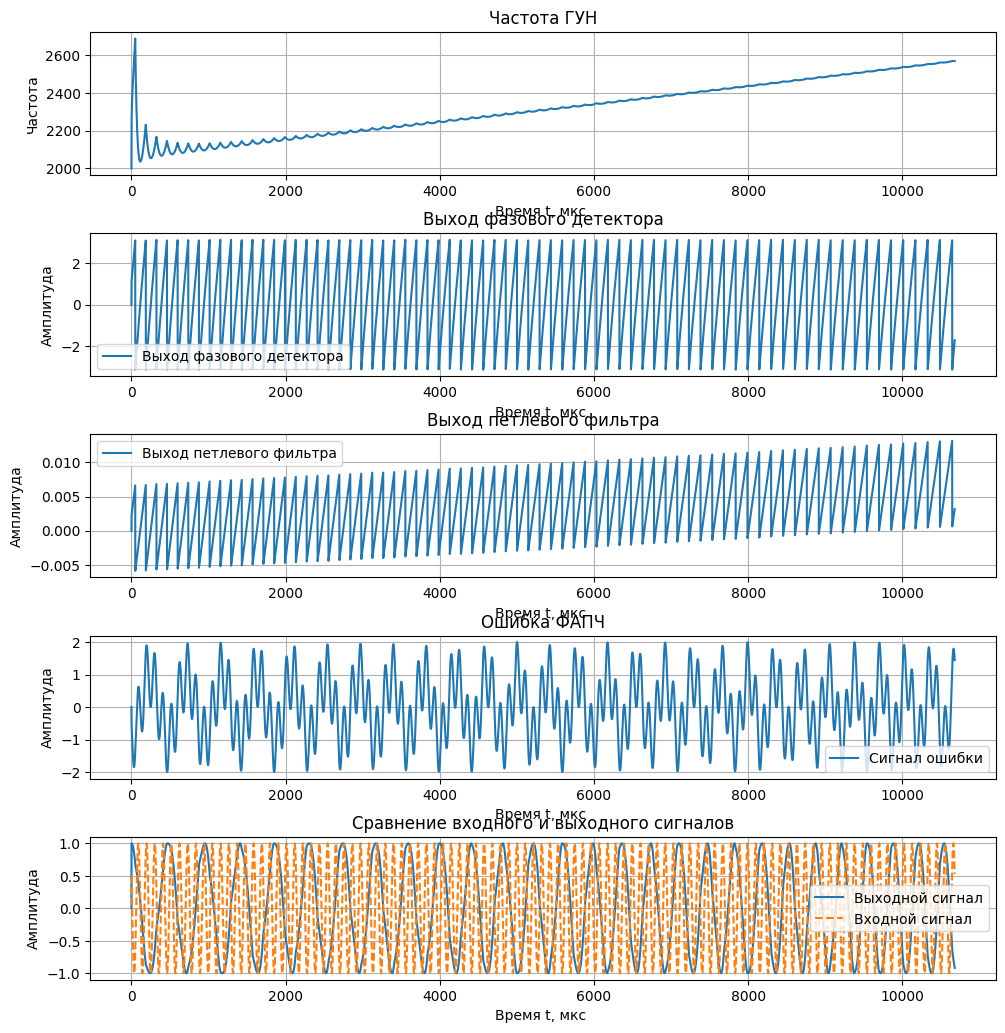

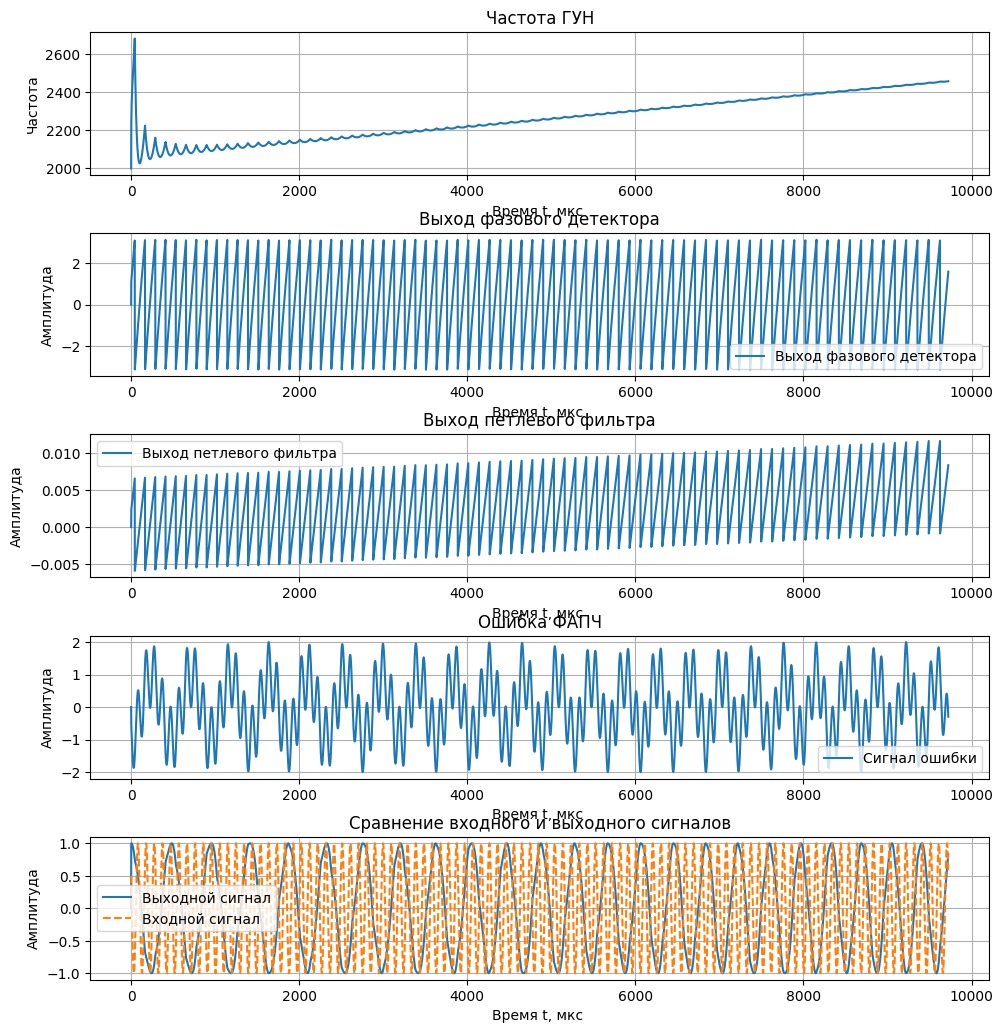

In [65]:
def PLL_freq(fs_pll, f_sig, f_vco, p_sig, K_pd, K_vco, number_periods):

    t = np.arange(0, number_periods*fs_pll/f_sig)/fs_pll
    signal_input = np.exp(1j*(2*np.pi*f_sig*t+p_sig))

    filter_state = {
        'integral_part': 0,
        'damping_factor': 0.5,
        'natural_freq': 2*np.pi*fs_pll/1000,
        'equivalent_noise_bandwidth': 0.001*fs_pll,
        'K_p' : 1/(K_pd*K_vco)*(4*0.5/(0.5 + 1/(4*0.5)))*0.001*fs_pll/fs_pll,
        'K_i' : 1/(K_pd*K_vco)*(4/(0.5 + 1/(4*0.5))**2)*(0.001*fs_pll/fs_pll)**2
    }

    res_lp = np.zeros(shape=np.shape(signal_input))
    LP_integral = np.zeros(shape=np.shape(signal_input))


    vco_state = {
        'phase': 0,
        'delta_phase_VCO': 2*np.pi*f_vco/fs_pll,  
        'K_vco': K_vco                       
    }

    res_vco = np.zeros(shape=np.shape(signal_input), dtype=complex)
    phase_vco = np.zeros(shape=np.shape(signal_input))


    phase_detector_out = np.zeros((np.shape(signal_input)), dtype=complex)


    signal_error = np.zeros((np.shape(signal_input)))
    signal_out = np.zeros((np.shape(signal_input)))


    for i in np.arange(1, len(signal_input)):
        res_vco[i], phase_vco[i], vco_state = vco(res_lp[i-1], vco_state)
        
        signal_out[i] = np.real(res_vco[i])
        signal_error[i] = signal_input[i] - signal_out[i]
    
        phase_detector_out[i] = PhaseDetector(signal_input[i], res_vco[i], 1)
        res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])
    
    plt.figure(figsize=(10,10))

    plt.subplot(5, 1, 1)
    plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')
    plt.title('Частота ГУН')
    plt.xlabel('Время t, мкс ')
    plt.grid()
    plt.ylabel('Частота')
    plt.tight_layout()
    
    plt.subplot(5, 1, 2)
    plt.plot(np.arange(0, len(phase_detector_out))/fs_pll*1e6, phase_detector_out, '-', label = 'Выход фазового детектора')
    plt.title('Выход фазового детектора')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    plt.subplot(5, 1, 3)
    plt.plot(np.arange(0, len(res_lp))/fs_pll*1e6, res_lp, '-', label = 'Выход петлевого фильтра')
    plt.title('Выход петлевого фильтра')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    plt.subplot(5, 1, 4)
    plt.plot(np.arange(0, len(signal_error))/fs_pll*1e6, signal_error, '-', label = 'Сигнал ошибки')
    plt.title('Ошибка ФАПЧ')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    plt.subplot(5, 1, 5)
    plt.plot(np.arange(0, len(signal_out))/fs_pll*1e6, signal_out, '-', label = 'Выходной сигнал')
    plt.plot(np.arange(0, len(signal_input))/fs_pll*1e6, signal_input, '--', label = 'Входной сигнал')
    plt.title('Сравнение входного и выходного сигналов')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()
    
fs_pll = 1e6
f_vco = 2000
f_sig = f_vco + np.linspace(0, 2*np.pi*0.001*fs_pll + 2e3, 10)
p_sig = np.pi/3
K_pd = 1
K_vco = 1
number_periods = 100


for f_sig_i in f_sig:
    PLL_freq(fs_pll, f_sig_i, f_vco, p_sig, K_pd, K_vco, number_periods)

Полученные в результате моделирования графики показывают, что с ростом отклонения частоты увеличивается время подстройки блоков. 

### 10. Синтезатор частот на основе ФАПЧ  
В данном разделе был выполнен синтезатор частот на основе уже имеющегося ФАПЧ. Его задача генерировать выходной сигнал со стабильной и точно заданной частотой, кратной опорной (входной) частоте. 

C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3816771420.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_error[i] = signal_input[i] - signal_out[i]
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3816771420.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3816771420.py:49: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')


Входной сигнал [0.5       +0.8660254j  0.49454877+0.86914988j 0.48907801+0.87224005j ...
 0.5162344 +0.85644734j 0.51084303+0.85967401j 0.50543149+0.86286674j], Выходной сигнал [0.         0.99998026 0.99989232 ... 0.41628079 0.44463518 0.47255076], M = 1000, N = 5


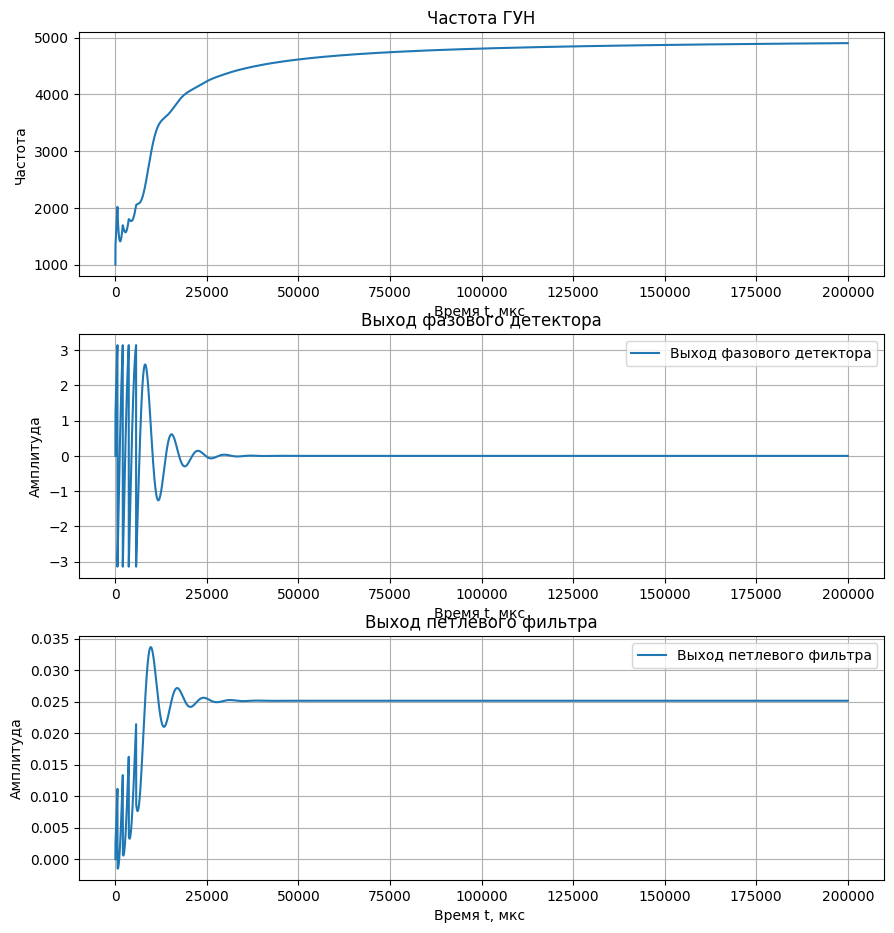

In [ ]:
def Freq_synth(M, N, fs_pll, f_sig, f_vco, p_sig, K_pd, K_vco, number_periods):

    t = np.arange(0, number_periods*fs_pll/(f_sig/M))/fs_pll
    signal_input = np.exp(1j*(2*np.pi*f_sig/M*t+p_sig))

    filter_state = {
        'integral_part': 0,
        'damping_factor': 0.5,
        'natural_freq': 2*np.pi*fs_pll/1000,
        'equivalent_noise_bandwidth': 0.001*fs_pll,
        'K_p' : 1/(K_pd*K_vco)*(4*0.5/(0.5 + 1/(4*0.5)))*0.001*fs_pll/fs_pll,
        'K_i' : 1/(K_pd*K_vco)*(4/(0.5 + 1/(4*0.5))**2)*(0.001*fs_pll/fs_pll)**2
    }

    res_lp = np.zeros(shape=np.shape(signal_input))
    LP_integral = np.zeros(shape=np.shape(signal_input))


    vco_state = {
        'phase': 0,
        'delta_phase_VCO': 2*np.pi*f_vco/fs_pll,  
        'K_vco': K_vco                       
    }

    res_vco = np.zeros(shape=np.shape(signal_input), dtype=complex)
    phase_vco = np.zeros(shape=np.shape(signal_input))
    vco_out = np.zeros(shape=np.shape(signal_input), dtype=complex)

    phase_detector_out = np.zeros((np.shape(signal_input)), dtype=complex)


    signal_error = np.zeros((np.shape(signal_input)))
    signal_out = np.zeros((np.shape(signal_input)))


    for i in np.arange(1, len(signal_input)):
        res_vco[i], phase_vco[i], vco_state = vco(res_lp[i-1], vco_state)
        
        signal_out[i] = np.real(res_vco[i])
        acc = 0 
        vco_out[i] = np.exp(1j*phase_vco[i]/N)
        signal_error[i] = signal_input[i] - signal_out[i]
    
        phase_detector_out[i] = PhaseDetector(signal_input[i], vco_out[i], 1)
        res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])
    
    plt.figure(figsize=(9,9))

    plt.subplot(3, 1, 1)
    plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')
    plt.title('Частота ГУН')
    plt.xlabel('Время t, мкс ')
    plt.grid()
    plt.ylabel('Частота')
    plt.tight_layout()
    
    plt.subplot(3, 1, 2)
    plt.plot(np.arange(0, len(phase_detector_out))/fs_pll*1e6, phase_detector_out, '-', label = 'Выход фазового детектора')
    plt.title('Выход фазового детектора')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(np.arange(0, len(res_lp))/fs_pll*1e6, res_lp, '-', label = 'Выход петлевого фильтра')
    plt.title('Выход петлевого фильтра')
    plt.xlabel('Время t, мкс ')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()

    
    return signal_input, signal_out

fs_pll = 1e6
f_vco = 1e3
f_sig = 1e6
p_sig = np.pi/3
K_pd = 1
K_vco = 1
number_periods = 200
M = 1000
N = 5

signal_input, signal_output = Freq_synth(M, N, fs_pll, f_sig, f_vco, p_sig, K_pd, K_vco, number_periods)
print(f'Входной сигнал {signal_input}, Выходной сигнал {signal_output}, M = {M}, N = {N}')

Полученные графики показывают результат коррекрной работы синтезатора, поскольку 
$$ f_{vco} = N/M⋅f_{sig}$$
Таким образом, 5/1000⋅1e6 = 5000  

Далее определены границы корректной работы синтезатора.

C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3816771420.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  signal_error[i] = signal_input[i] - signal_out[i]
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3816771420.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  res_lp[i], LP_integral[i], filter_state = loop_filter_process(filter_state, phase_detector_out[i])
C:\Users\Victoria\AppData\Local\Temp\ipykernel_12228\3816771420.py:49: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.arange(0, len(phase_vco))/fs_pll*1e6, phase_vco/(2*np.pi*t), '-', label = 'Частота ГУН')


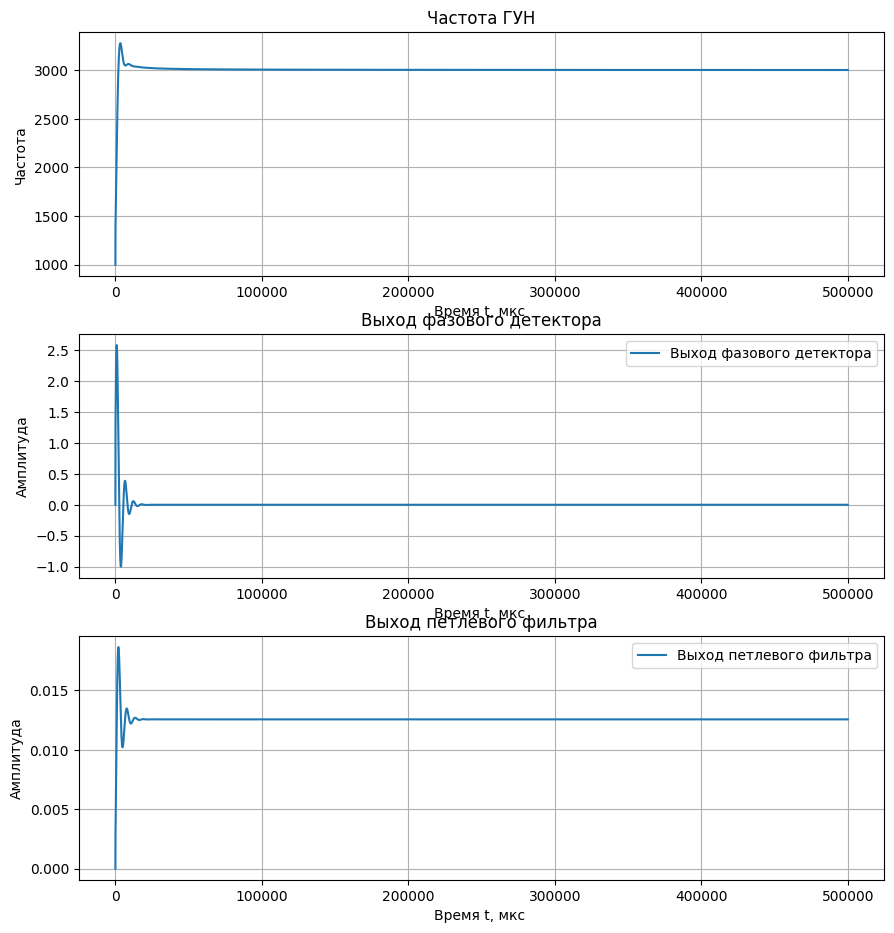

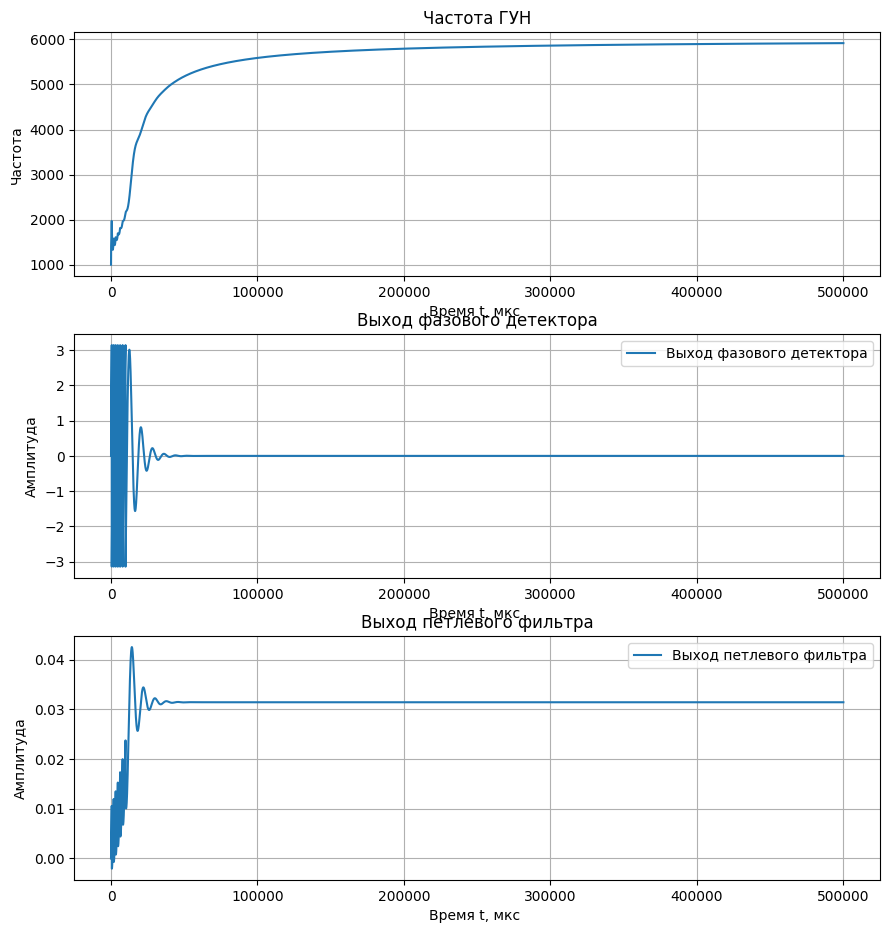

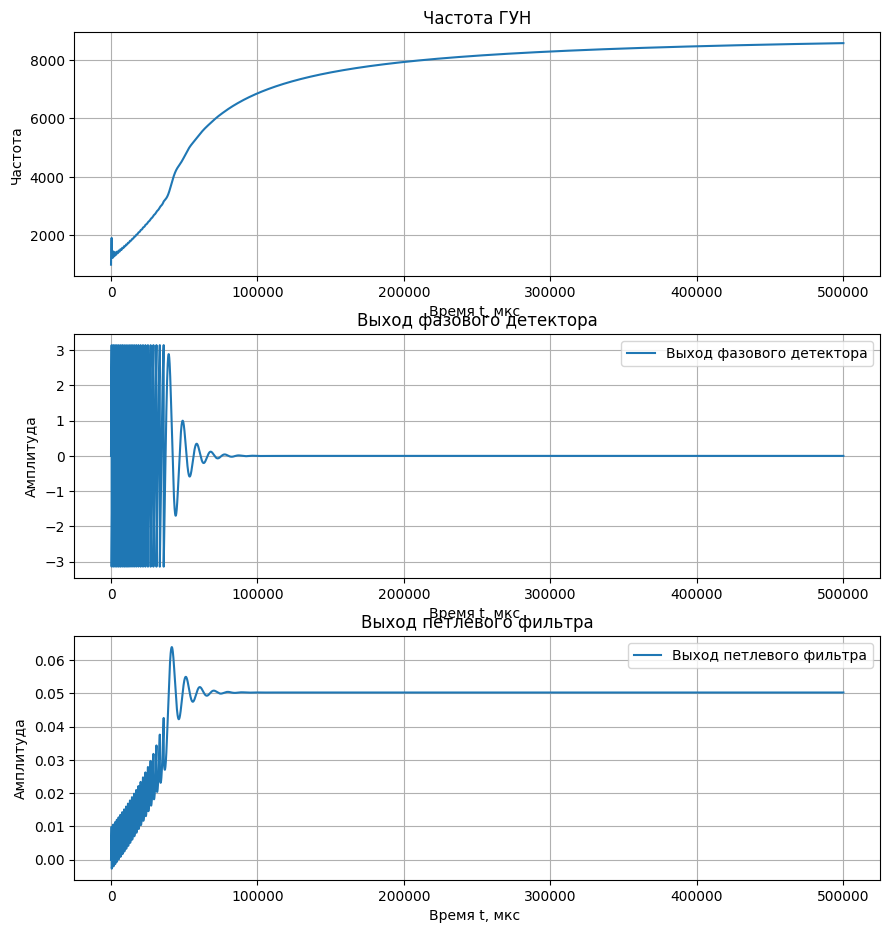

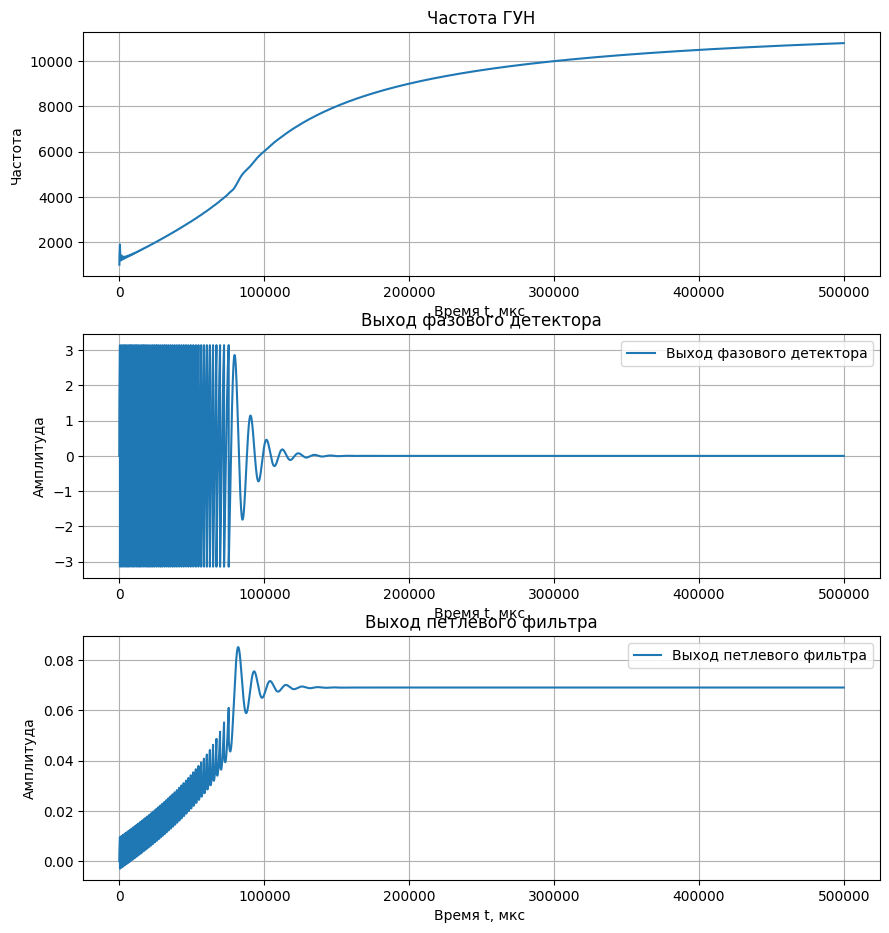

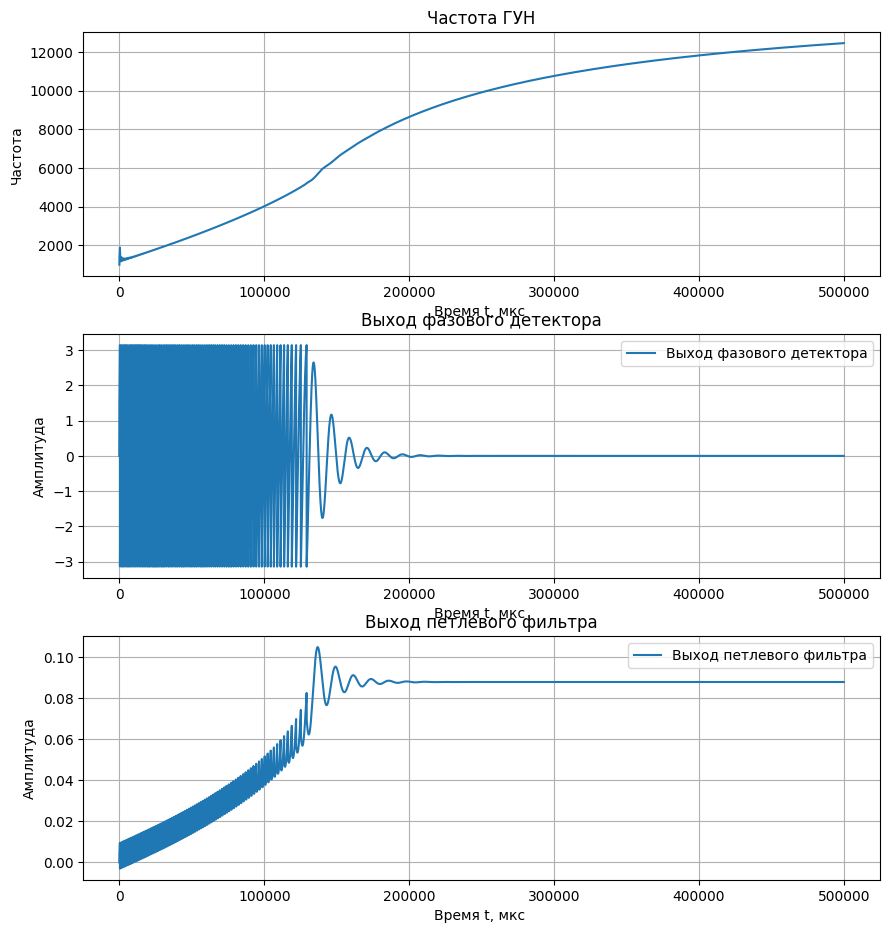

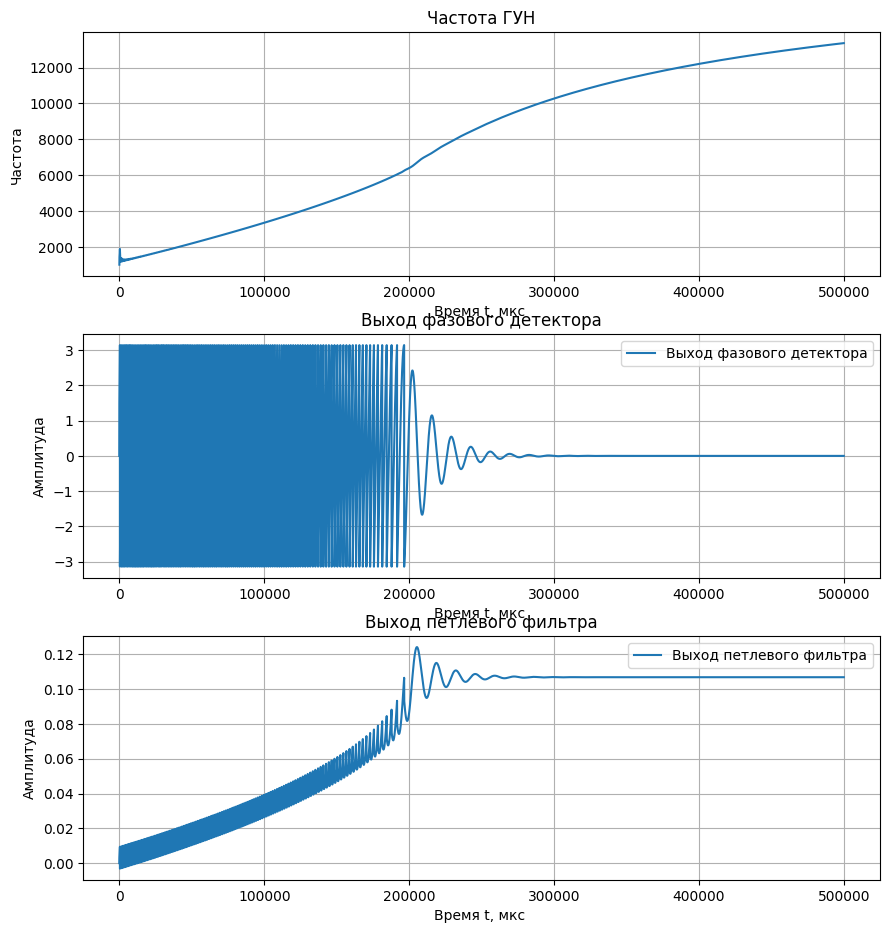

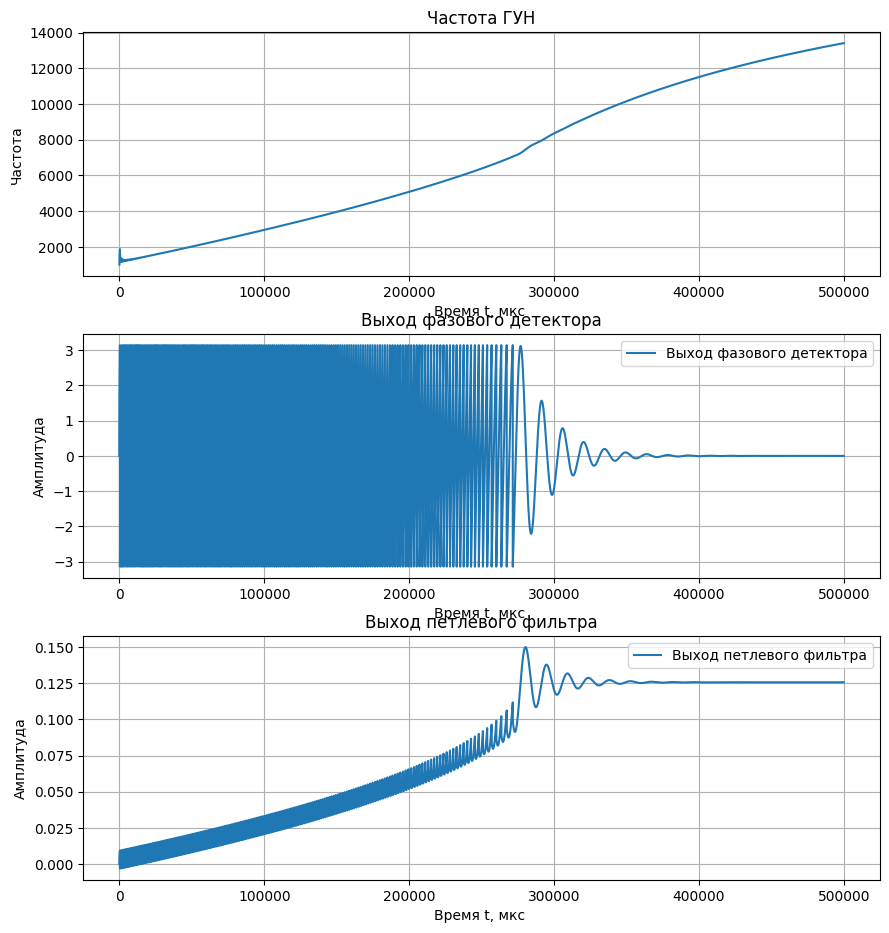

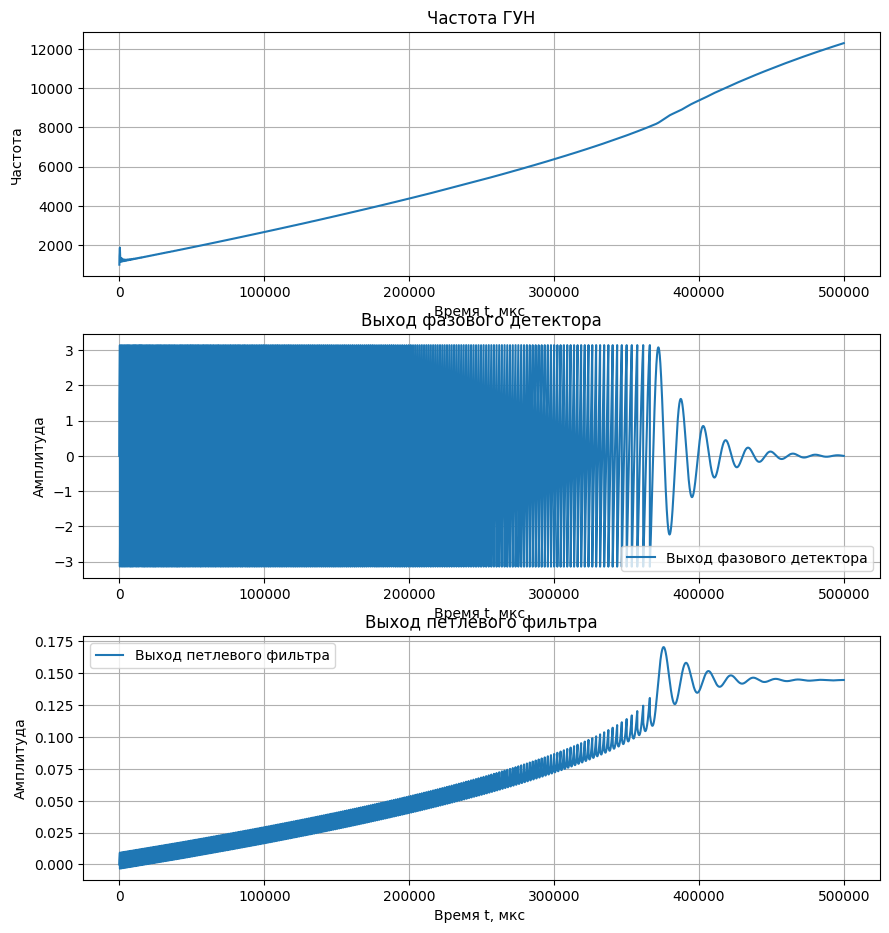

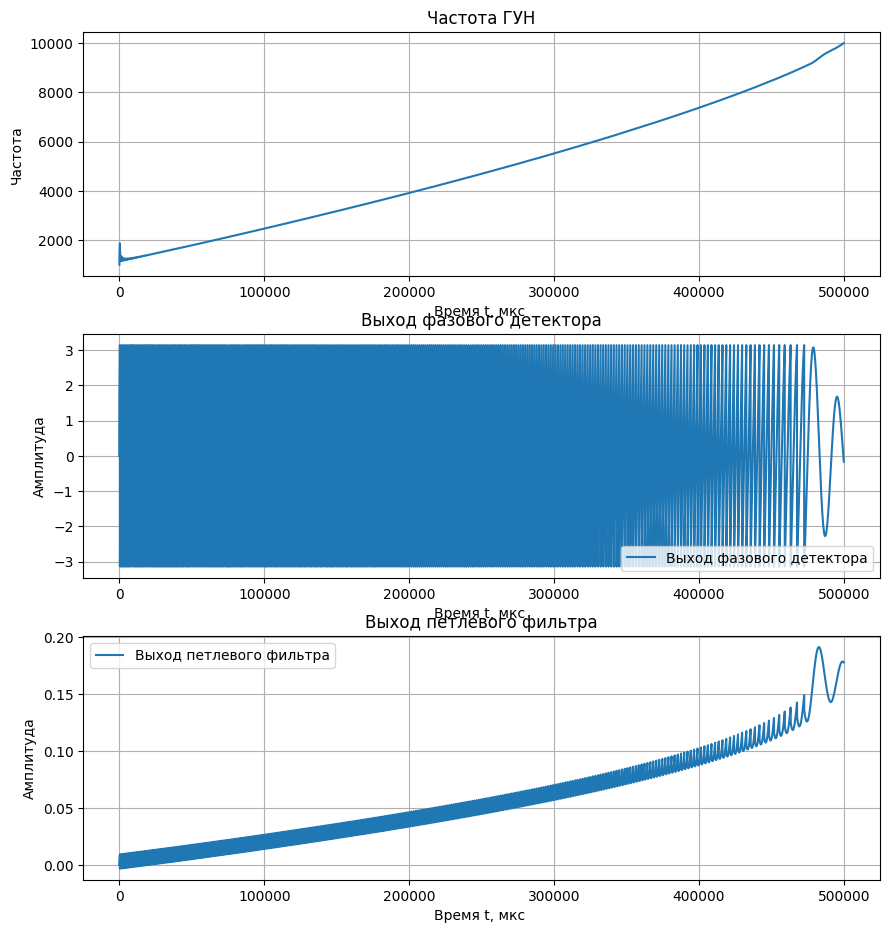

In [67]:
fs_pll = 1e6
f_vco = 1e3
f_sig = 1e6
p_sig = np.pi/3
K_pd = 1
K_vco = 1
number_periods = 500
M = 1000
N = np.arange(1, 10)*3

for n in N:
    signal_input, signal_output = Freq_synth(M, n, fs_pll, f_sig, f_vco, p_sig, K_pd, K_vco, number_periods)

Полученные результаты показывают, что синтезатор справился с генерацией частот в диапазоне от 1 до 24 кГц.

### Вывод  
В ходе выполнения лабораторной работы был реализован ФАПЧ, состоящий из блоков ГУНа, петлевого фильтра и фазового детектора. Каждый блок был протестирован на корректную работу как по-отдельности, так и совместно в системе ФАПЧ.   
Проведено исследование результатов работы ФАПЧ при различных значениях отношений сигнал/шум. Как и предполагалось, с уменьшением отношения сигнал/шум результаты работы ФАПЧ ухудшаются: увеличивается время подстройки, увеличивается амплитуда сигнала ошибки.  
Проведено исследование зависимости результатов работы ФАПЧ от частоты входного сигнала. С увеличением частоты также увеличивается время подстройки ФАПЧ.  
В рамках работы на основе ФАПЧ был получен синтезатор частот. Анализ показал, что синтезатор может сгенерировать сигналы с частотами в диапазоне от 1 до 24 кГц.